<a name = "inicio"></a>

***

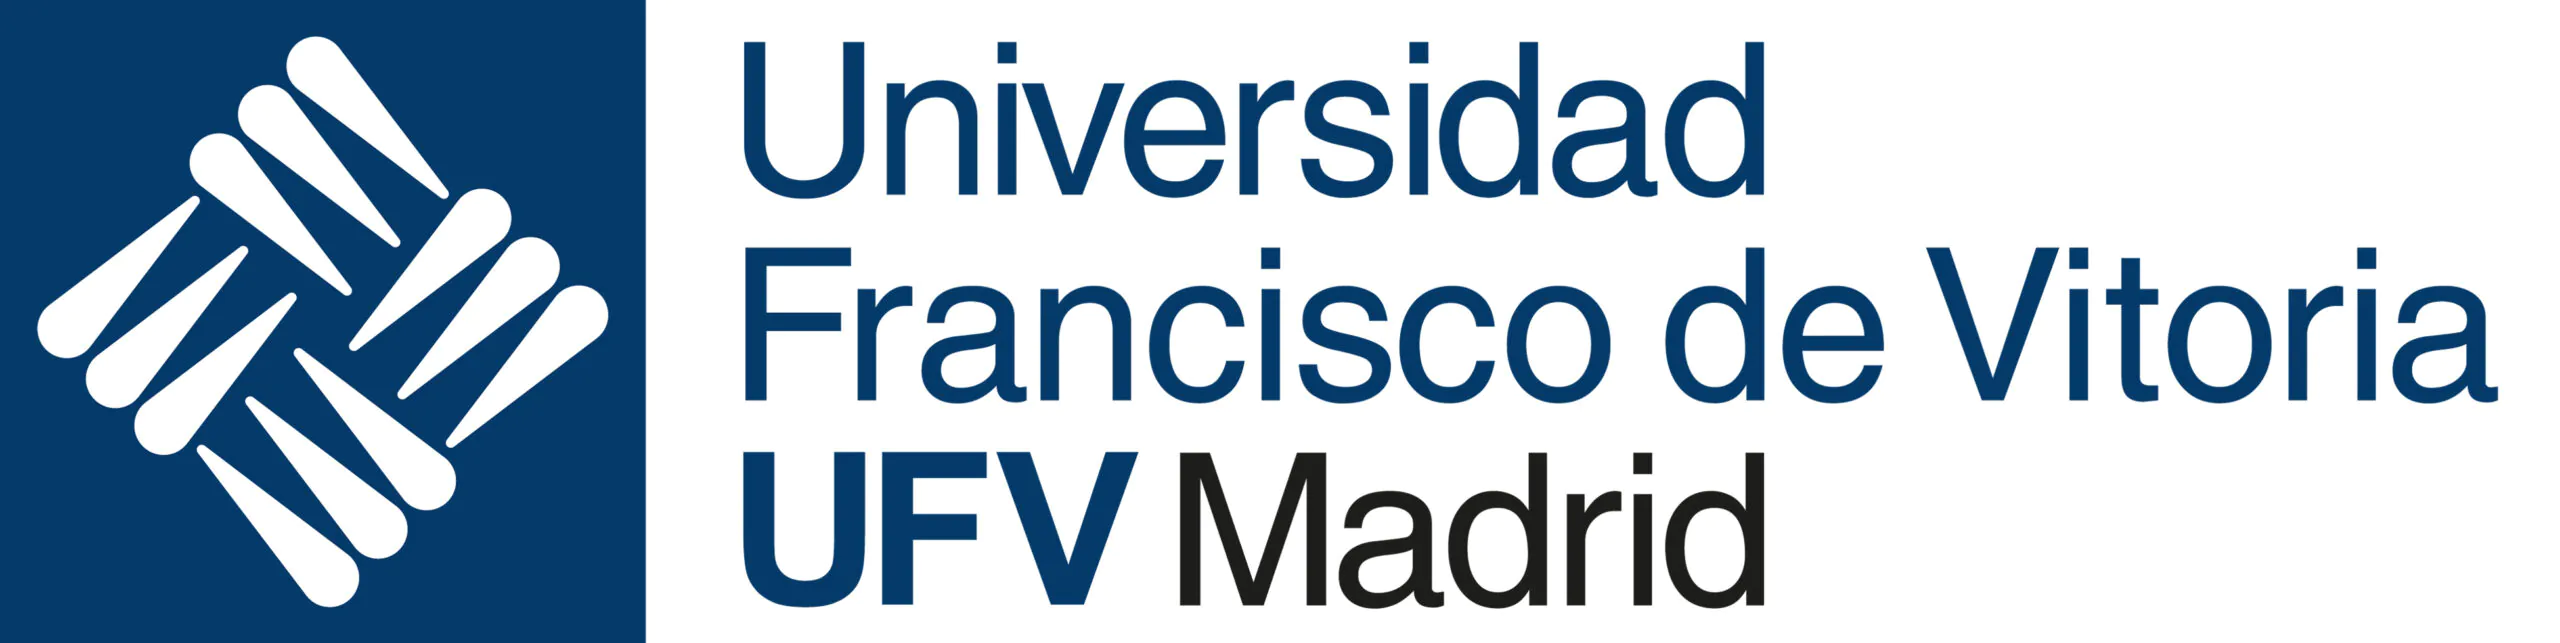

***

**<mark>Nota.-**<mark><div style="background-color:#F7DC6F"><b>Tened en cuenta que las soluciones que aparecen recogidas en este notebook no muestran (en su totalidad) la respuesta que ustedes tendréis que dar en vuestras resoluciones. Simplemente se aportan los resultados principales de cada uno de los ejercicios propuestos para que podáis utilizarlos como referencias a la hora de autoevaluaros. Recordar que tenéis que completar cada uno de ellos incluyendo comentarios acerca de los resultados obtenidos describiendo con detalle cada una de las celdas tipo código paso a paso lo que estáis haciendo. </b></div>

***

### Ejercicio 1 

Considerar la información de la base de datos `airquality` de la librería $\tt datasets$, que consiste en $154$ medidas (de $6$ variables) de calidad del aire en Nueva York en los últimos tiempos. La variable dependiente `Ozone` que es la concentración media de ozono en la atmósfera (en ppb, partes por billón) se quiere explicar a partir de la variable independiente `Temp` que nos indica la temperatura máxima diaria (en grados Fahrenheit). Realizar los siguientes apartados:

1. Exploración inicial de la base de datos 
2. Análisis de la existencia de relación lineal entre las variables
3. Estimación de un modelo de regresión lineal simple entre las variables
4. Interpretación de las salidas de estimación de un modelo de regresión lineal simple

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 01</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1: Exploración inicial de la base de datos</b></div>

Vamos a utilizar el conjunto de datos `airquality` de la libería $\tt datasets$ que consiste en $154$ medidas (de $6$ variables) de calidad del aire en Nueva York en los últimos años. Estamos interesados en explicar la concentración media de ozono en la atmósfera (en ppb, partes por billón) a partir de la temperatura máxima diaria (en grados Fahrenheit). En este caso, nuestra variable dependiente será `Ozone` y la variable independiente será `Temp`. 

In [1]:
# Cargamos la base de datos que nos interesa
data(airquality)

In [2]:
# Estructura de la base de datos 'airquality'
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [3]:
# Clases de la base de datos 'airquality'
class(airquality)

[1] "data.frame"

In [4]:
# Dimensiones de la base de datos 'airquality'
dim(airquality)

[1] 153   6

In [5]:
# Variables de la base de datos 'airquality'
names(airquality)

[1] "Ozone"   "Solar.R" "Wind"    "Temp"    "Month"   "Day"

In [6]:
# Seleccionamos las 2 variables que nos interesan
zdata = airquality[, c("Ozone", "Temp")]

In [7]:
# Visualizamos la base de datos seleccionada
head(zdata)

,Ozone,Temp
,<int>,<int>
1,41,67
2,36,72
3,12,74
4,18,62
5,NA,56
6,28,66


In [8]:
# Comprobamos si existen datos NAs para en caso afirmativo, eliminarlos y que no nos den problemas
wdata = na.omit(zdata)

In [9]:
# Podemos comprobar como se han eliminado 37 observaciones por no tener datos
nrow(zdata) # Base de datos inicial
nrow(wdata) # Base de datos tras el na.omit

[1] 153

[1] 116

In [10]:
# Visualizamos la base de datos seleccionada
head(wdata)

,Ozone,Temp
,<int>,<int>
1,41,67
2,36,72
3,12,74
4,18,62
6,28,66
7,23,65


In [11]:
# Realizamos el análisis exploratorio de las variables utilizadas 
summary(wdata)

     Ozone             Temp      
 Min.   :  1.00   Min.   :57.00  
 1st Qu.: 18.00   1st Qu.:71.00  
 Median : 31.50   Median :79.00  
 Mean   : 42.13   Mean   :77.87  
 3rd Qu.: 63.25   3rd Qu.:85.00  
 Max.   :168.00   Max.   :97.00  

<div style="background-color:#0BF7CC"><b> Nota.- En este punto, como ya os comenté, tenéis que incluir un análisis más detallado de todos los estadísticos descriptivos que hemos visto en el Notebook 2.1 (gráficos de frecuencias, medidas de tendencia central, posición, dispersión y forma) así como iterpretar los resultados obtenidos tal y como se ha comentado en las sesiones teóricas. </b></div>

<div style="background-color:#5DADE2"><b>Apartado 2. Análisis de la existencia de relación lineal entre las variables</b></div>

Antes de realizar ningún tipo de modelización tenéis que aseguraros que podemos aplicar un modelo de regresión entre las variables consideradas. Para ello, tiene que existir una relación entre las mismas. En caso contrario NO podremos realizar ningún tipo de análisis de regresión utilizando dichas vraiables.

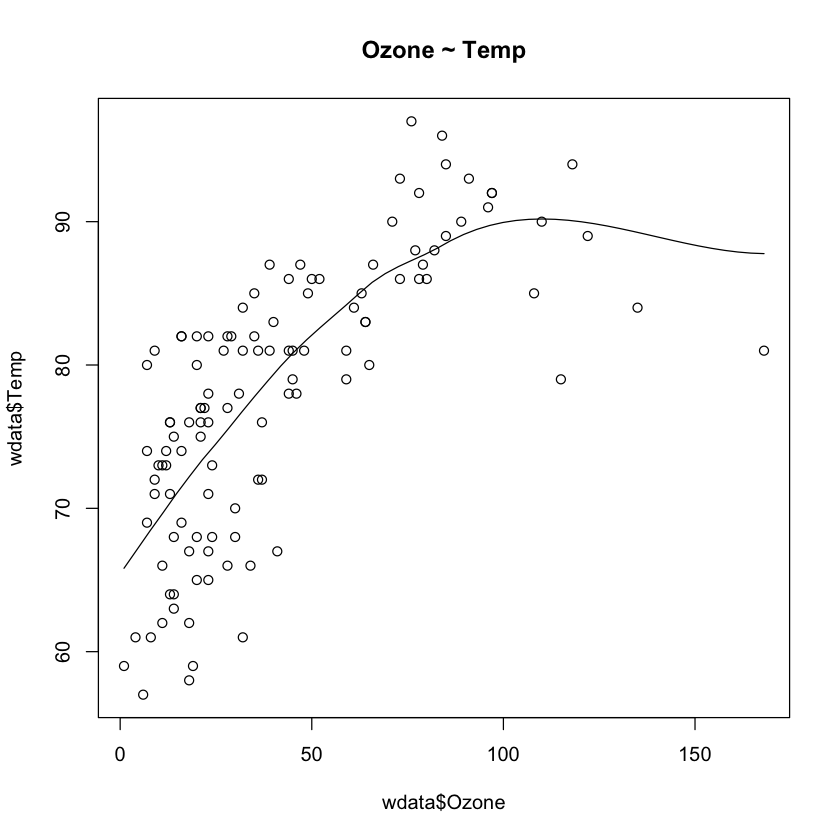

In [12]:
# Evidencia gráfica a través del gráfico de dispersión 
scatter.smooth(x = wdata$Ozone, y = wdata$Temp, main = "Ozone ~ Temp")

**<u>Interpretación resultados</u>.-** Podemos observar en el gráfico de dispersión que no existe un patrón aleatorio, es decir, que no nos aparece todo el cuadrado lleno de puntos colocados de manera aleatoria. Luego, este hecho, es una evidencia de que podría existir una relación entre las variables. Como siempre, tenemos que confirmarlo con las evidencias numércias y contrastadas.

In [13]:
# Evidencia numérica
cor(wdata$Ozone, wdata$Temp)

[1] 0.6983603

**<u>Interpretación resultados</u>.-** Observamos que el coeficiente de correlación estimado entre las variables es distinto de $0$, con lo cual es posible que se cumpla lo que habíamos observado gráficamente: que las variables sí están relacionadas. Sin embargo, hasta que no realicemos el contraste de correlación no sabremos si está bien calculado dicho coeficiente y podemos tomarlo como válido.

In [14]:
# Evidencia contrastada
cor.test(wdata$Ozone, wdata$Temp)


	Pearson's product-moment correlation

data:  wdata$Ozone and wdata$Temp
t = 10.418, df = 114, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5913340 0.7812111
sample estimates:
      cor 
0.6983603 


**<u>Interpretación resultados</u>.-** El $p$-valor obtenido es muy pequeño: $< 2.2e-16$ siendo $< \alpha = 0.05$, luego tenemos que rechazar la hipótesis nula de que la correlación sea igual $0$, es decir, la concentración media de ozono en la atmósfera y la temperatura máxima diaria SI están correlacionados. En particular, el coeficiente de correlación sería igual a $0.6983603$ determinando que existe una relación directa entre el nivel de concentración media de ozono y el nivel de temperatura máxima. Es decir, a mayores temperaturas medias diarias, habrá un mayor concentración de ozono en la atmósfera y viceversa. Por tanto, SI podemos realizar la estimación de un modelo de regresión lineal entre dichas variables.

<div style="background-color:#5DADE2"><b>Apartado 3: Estimación de un modelo de regresión lineal simple entre las variables</b></div>

El Modelo de Regresión Lineal Simple (MRLS) que tenemos que estimar utilizando las funciones de R sería el siguiente: 

\begin{align*}
Ozone_{i}&=\beta_{0}+\beta_{1}*Temp_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

In [15]:
# Estimación del modelo de regresión lineal simple incluyendo el dataset como parámetro
modelo = lm(Ozone ~ Temp, data = wdata)  
modelo


Call:
lm(formula = Ozone ~ Temp, data = wdata)

Coefficients:
(Intercept)         Temp  
   -146.995        2.429  


**<u>Interpretación resultados</u>.-** Los coeficientes del modelo de regresión lineal estimado son $\beta_0 = -146.995$ y $\beta_1 = 2.429$. La interpretación de los parámetros $\beta_0$ y $\beta_1$ en un modelo de regresión lineal simple donde la variable dependiente es la concentración media de ozono en la atmósfera y la variable independiente es la temperatura máxima diaria es fundamental para comprender la relación entre estas dos variables. En este caso, $\beta_0=-146.995$ representa el valor de la intersección con el eje y, lo que implica el nivel de concentración de ozono cuando la temperatura media diaria es cero. Este valor puede ser interpretado como el coeficiente del nivel de concentración base o de inicio sin considerar la temperatura existente. Por otro lado, $\beta_1=2.429$ es el coeficiente de la pendiente y muestra cómo cambia el nivel de concentración de ozono en función de la temperatura. Específicamente, indica que por cada grado adicional que se aumente en la temperatura, se espera un aumento de $2.429$ ppb unidades en el nivel de concentración de ozono en la atmósfera. Este coeficiente positivo sugiere una relación directa y proporcional entre ambas variables, donde un mayor nivel de temperatura media diaria se asocia con concentraciones de ozono en la atmósfera más altas.

In [16]:
# Información de salida del modelo de regresión estimado
str(modelo)

List of 12
 $ coefficients : Named num [1:2] -147 2.43
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "Temp"
 $ residuals    : Named num [1:116] 25.27 8.13 -20.73 14.42 14.7 ...
  ..- attr(*, "names")= chr [1:116] "1" "2" "3" "4" ...
 $ effects      : Named num [1:116] -453.7 247 -23 11.4 11.9 ...
  ..- attr(*, "names")= chr [1:116] "(Intercept)" "Temp" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:116] 15.73 27.87 32.73 3.58 13.3 ...
  ..- attr(*, "names")= chr [1:116] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:116, 1:2] -10.7703 0.0928 0.0928 0.0928 0.0928 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:116] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "Temp"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.09 1.05
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 114
 $ xlevels      : Name

<div style="background-color:#5DADE2"><b>Apartado 4: Interpretación de las salidas de estimación de un modelo de regresión lineal simple</b></div>

Las principales funciones que se aplican sobre un objeto `lm` (obtenido tras realizar la estimación oportuna del modelo de regresión lineal):

1. ¿Cómo extraer el output de la regresión? Tenéis que utilizar la función **`summary()`**. 
2. ¿Cómo extraer los coeficientes de regresión estimados? Tenéis que utilizar la función **`coef()`**. 
3. ¿Cómo extraer los valores ajustados de la variable dependiente? Tenéis que utilizar la función **`fitted()`**.
4. ¿Cómo extraet los residuos estimados? Tenéis que utilizar la función **`resid()`**.
5. ¿Cómo extraer los grados de libertad? Tenéis que utilizar la función `df.residual`.
6. ¿Cómo extraer la suma de cuadrados de los residuos? Tenéis que utilizar la función **`deviance()`**.
7. ¿Cómo extraer los errores de los coeficientes de regresión estimados? No hay función de extracción para este caso.
8. ¿Cómo extraer los coeficientes de determinación? No hay función de extracción para este caso.
9. ¿Cómo extraer los intervalos de confianza para los coeficientes de regresión? Tenéis que utilizar la función **`confint()`**.
10. ¿Cómo extraer el estadístico F y su p-valor? Tenéis que utilizar la función **`anova()`**.

<div style="background-color:#0BF7CC"><b> Nota.- En este punto, como ya os comenté, tenéis que incluir una interpretación de cada uno de los resultados obtenidos en los 10 apartados. En este caso, solo mostraré los resultados para que podáis verificar si lo habéis realizado correctamente o no. Podéis utilizar como referencia para comentar cada uno de los puntos las interpretaciones incluidas en los Notebooks teóricos. </b></div>

#### 4.1 ¿Cómo extraer el output de la regresión?

In [17]:
# Aplicamos la función summary para obtener los principales resultados del modelo de regresión lineal
output = summary(modelo)
output


Call:
lm(formula = Ozone ~ Temp, data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.729 -17.409  -0.587  11.306 118.271 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -146.9955    18.2872  -8.038 9.37e-13 ***
Temp           2.4287     0.2331  10.418  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.71 on 114 degrees of freedom
Multiple R-squared:  0.4877,	Adjusted R-squared:  0.4832 
F-statistic: 108.5 on 1 and 114 DF,  p-value: < 2.2e-16


#### 4.2 ¿Cómo extraer los coeficientes de regresión estimados?

Vamos a extraer los coeficientes de regresión estimados a través de tres formas diferentes siendo todas ellas equivalentes. 

* Extracción directa de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})'$ utilizando el objeto `output`.


* Extracción de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})$ con la función $\tt coef$ sobre el `modelo` estimado.


* Cálculo manual de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})'$ a partir de la siguiente ecuación formal:

\begin{align*}
\hat{\beta}_{1}&=\frac{Cov(x,y)}{Var(x)}\\
\hat{\beta}_{0}&=\bar{y}-\hat{\beta}_{1}\bar{x}
\end{align*}

<div style="background-color:#0BF7CC"><b> Nota.- Ustedes, al menos, para aprobar estos apartados tendréis que incluir una de las tres o dos maneras (dependiendo del punto) aunque se valorará positivamente el hecho de que sea lo más completo posible para poder sacar la nota máxima en este tipo de ejercicios. </b></div>

In [18]:
# Extracción directa de los coeficientes de regresión (utilizamos output NO modelo)
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-146.995491,18.2871736,-8.038174,9.366854e-13
Temp,2.428703,0.2331318,10.417724,2.931897e-18


In [19]:
# Extracción de los coeficientes de regresión con la función `coef`
bhat = coef(modelo)
bhat 

(Intercept)        Temp 
-146.995491    2.428703

In [20]:
# Cálculo manual de b1
# Obtenemos la covarianza entre x e y
covxy = cov(wdata$Ozone,wdata$Temp)
covxy

[1] 218.5212

In [21]:
# Obtenemos la varianza entre x e y
varx = var(wdata$Temp)
varx

[1] 89.97444

In [22]:
# Aplicamos la ecuación b1 = covxy/varx  
b1 = covxy/varx
b1

[1] 2.428703

In [23]:
# Cálculo manual de b0
# Obtenemos la media de la variable y
meany = mean(wdata$Ozone)
meany

[1] 42.12931

In [24]:
# Obtenemos la media de la variable x
meanx = mean(wdata$Temp)
meanx

[1] 77.87069

In [25]:
# Aplicamos la ecuación b0= meany-b1*meanx
b0 = meany-b1*meanx
b0

[1] -146.9955

#### 4.3 ¿Cómo extraer los valores ajustados de la variable dependiente?

Vamos a extraer los valores ajustados de la variable dependiente a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa de los valores ajustados de nuestra variable dependiente $\hat{y}$ sobre el `modelo` estimado.


+ Extracción de los valores ajustados de nuestra variable dependiente $\hat{y}$ con la función $\tt fitted$ sobre el `modelo` estimado.


+ Cálculo manual de los valores ajustados de nuestra variable dependiente $\hat{y}$ a partir de la siguiente ecuación formal:

\begin{align*}
\hat y_i&=\hat \beta_{0}+\hat \beta_{1}x_i 
\end{align*}

In [26]:
# Extracción directa de los valores ajustados de la variable dependiente
head(modelo$fitted.values)

1         2         3         4         6         7 
15.727630 27.871147 32.728554  3.584114 13.298927 10.870224

In [27]:
# Extracción de los valores ajustados de la variable dependiente con la función `fitted`
yhat = fitted(modelo)
head(yhat)

1         2         3         4         6         7 
15.727630 27.871147 32.728554  3.584114 13.298927 10.870224

In [28]:
# Cálculo manual de los valores ajustados (alternativa a)
yajustado = bhat[1]+bhat[2]*wdata$Temp
head(yajustado)

[1] 15.727630 27.871147 32.728554  3.584114 13.298927 10.870224

In [29]:
# Cálculo manual de los valores ajustados (alternativa b)
yajustado1 = bhat["(Intercept)"]+bhat["Temp"]*wdata$Temp
head(yajustado1)

[1] 15.727630 27.871147 32.728554  3.584114 13.298927 10.870224

#### 4.4 ¿Cómo extraer los residuos estimados?

Vamos a extraer los residuos estimados a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa del valor de los residuos estimados $\hat{\epsilon}$ sobre el `modelo` estimado.


+ Extracción del valor de los residuos estimados $\hat{\epsilon}$ con la función $\tt resid$ sobre el `modelo`  estimado.


+ Cálculo manual del valor de los residuos estimados $\hat{\epsilon}$ a partir de la siguiente ecuación formal. Es decir, los resiudos se calculan como la diferencia entre el valor predicho o ajustado y el valor real tal entre cada individuo $i=1,..., n$.

\begin{align*}
\hat \epsilon_i = y_i - \hat y_i 
\end{align*}

In [30]:
# Extracción directa del valor de los residuos estimados
head(modelo$residuals)

1          2          3          4          6          7 
 25.272370   8.128853 -20.728554  14.415886  14.701073  12.129776

In [31]:
# Extracción del valor de los residuos estimados con la función `resid`
uhat = resid(modelo)
head(uhat)

1          2          3          4          6          7 
 25.272370   8.128853 -20.728554  14.415886  14.701073  12.129776

In [32]:
# Cálculo manual del valor de los residuos
residuos = wdata$Ozone-yajustado
head(residuos)

[1]  25.272370   8.128853 -20.728554  14.415886  14.701073  12.129776

In [33]:
# Comprobamos y = y_estimado + residuos_estimados
head(cbind(wdata$Ozone,yhat,yajustado,yajustado1,uhat,residuos))

,,yhat,yajustado,yajustado1,uhat,residuos
1,41,15.727630,15.727630,15.727630,25.272370,25.272370
2,36,27.871147,27.871147,27.871147,8.128853,8.128853
3,12,32.728554,32.728554,32.728554,-20.728554,-20.728554
4,18,3.584114,3.584114,3.584114,14.415886,14.415886
6,28,13.298927,13.298927,13.298927,14.701073,14.701073
7,23,10.870224,10.870224,10.870224,12.129776,12.129776


In [34]:
# Comprobamos y = y_estimado + residuos_estimados (1º observación)
15.727630+25.272370

[1] 41

#### 4.5 ¿Cómo extraer los grados de libertad?

Vamos a extraer los grados de libertad estimados a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa del valor de los grados de libertad utilizando el objeto `output`.


+ Extracción del valor de los grados de libertad con la función $\tt df.residual$ sobre el `modelo` estimado.


+ Cálculo manual del valor de los grados de libertad a partir de la siguiente ecuación formal:

$g.d.l.=n-k$ siendo $n$ el número de obervaciones totales y $k$ el número de parámetros estimados.

In [35]:
# Extracción directa del valor de los grados de libertad (utilizamos output NO modelo)
head(output$df)[2]   

[1] 114

In [36]:
# Extracción del valor de los grados de libertad con la función `df.residual`
df = df.residual(modelo)
df

[1] 114

In [37]:
# Cálculo manual del valor de los grados de libertad (utilizamos output NO modelo)
gdl = nrow(wdata)- output$df[1]
gdl

[1] 114

#### 4.6 ¿Cómo extraer la suma de cuadrados de los residuos? 

Vamos a extraer la suma de cuadrados de los residuos estimados a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa de la suma de cuadrados de los residuos denotado por $SSR$ o $\hat{\sigma}$ utilizando el objeto `output`. Este estadístico cuantifica cuánta información de la variable dependiente se pierde con el modelo empleado (variables independientes utilizadas). Es útil cuándo lo comparamos con otros modelos.


+ Extracción del valor de la suma de cuadrados de los residuos con la función $\tt deviance$ sobre el `modelo` estimado.


+ Cálculo manual del valor de la suma de cuadrados de los residuos a partir de la siguiente ecuación formal:

\begin{align*}
SSR = \hat \sigma = \sqrt {\frac{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}} }}{{n - k}}}
\end{align*}

In [38]:
# Extracción directa de la suma de cuadrados de los residuos (utilizamos output NO modelo)
head(output$sigma)

[1] 23.71429

In [39]:
# Extracción del valor de la suma de cuadrados de los residuos con la función `deviance`
ssr = sqrt(deviance(modelo)/gdl)
ssr

[1] 23.71429

In [40]:
# Cálculo manual** del valor de la suma de cuadrados de los residuos
resi2 = (residuos)^2
sigma = sqrt(sum(resi2)/gdl)
sigma

[1] 23.71429

#### 4.7 ¿Cómo extraer los errores de los parámetros estimados?

Vamos a extraer los errores de los parámetros estimados a través de dos formas diferentes siendo todas ellas equivalentes:

+ Extracción directa de los errores de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})'$ utilizando el objeto `output`.


+ Cálculo manual de los errores de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})'$ a partir de la siguiente ecuación formal. Los errores estándar de los parámetros estimados (`Std. Error`) se obtienen a partir de la raíz cuadrada de la diagonal de la matriz de varianzas-covarianzas estimada. El estimador de la matriz de varianzas-covarianzas se calcula a través de la siguiente expresión y se obtiene a través de la función `vcov` directamente.

\begin{align*}
Var\left( {\hat \beta } \right) = {\hat \sigma^2}{\left( {X'X} \right)^{ - 1}}
\end{align*}

In [41]:
# Extracción directa de los errores de los coeficientes de regresión (utilizamos output NO modelo)
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-146.995491,18.2871736,-8.038174,9.366854e-13
Temp,2.428703,0.2331318,10.417724,2.931897e-18


In [42]:
# Cálculo manual de los errores de los coeficientes de regresión
# Obtener la matriz de var-cov directamente
varcov = vcov(modelo)
varcov

,(Intercept),Temp
(Intercept),334.420718,-4.23230774
Temp,-4.232308,0.05435046


In [43]:
# Obtenemos los errores estándar de los parámetros estimados 
se = sqrt(diag(varcov))
print(se)

(Intercept)        Temp 
 18.2871736   0.2331318 


In [44]:
# Obtenemos la matriz de var-cov paso a paso (paso 1)
X = as.matrix(cbind(cte=1,wdata[,2]))
head(X)

cte,
1,67
1,72
1,74
1,62
1,66
1,65


In [45]:
# Obtenemos la matriz de var-cov paso a paso (paso 2)
varcov2 = sigma^2 * solve(t(X) %*% X)
varcov2

,cte,
cte,334.420718,-4.23230774
,-4.232308,0.05435046


In [46]:
# Obtenemos los errores estándar de los parámetros estimados 
se2 = sqrt(diag(varcov2))
print(se2)

       cte            
18.2871736  0.2331318 


#### 4.8 ¿Cómo extraer los coeficientes de determinación?

Vamos a extraer los coeficientes de determinación estimados a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa del valor de los coeficientes de determinación utilizando el objeto `output`.


+ Cálculo manual del coeficiente de determinación a partir de la siguiente ecuación formal: (Opción 1)

\begin{align*}
R^{2}=1 - \frac{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}} }}{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }}
\end{align*}

siendo ${\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }$ la suma del cuadrado de la diferencia entre los valores originales de la variable dependiente $y_i$ y el valor promedio de la variable $\bar y_i$.

In [47]:
# Extracción directa del valor de los coeficientes de determinación
# Obtenemos R2 (utilizamos output NO modelo)
R2 = output$r.squared
R2

[1] 0.4877072

In [48]:
# Cálculo manual del coeficiente de determinación (Opción 1)
residuos2 = wdata$Ozone-mean(wdata$Ozone)
residuos2

[1]  -1.12931  -6.12931 -30.12931 -24.12931 -14.12931 -19.12931 -23.12931
  [8] -34.12931 -35.12931 -26.12931 -31.12931 -28.12931 -24.12931 -28.12931
 [15]  -8.12931 -36.12931 -12.12931 -31.12931 -41.12931 -31.12931 -38.12931
 [22] -10.12931 -19.12931   2.87069  72.87069  -5.12931 -13.12931  28.87069
 [29]  -3.12931 -19.12931 -21.12931  -5.12931 -22.12931 -30.12931 -29.12931
 [36]  92.87069   6.87069 -10.12931  21.87069  -2.12931  34.87069  54.87069
 [43]  54.87069  42.87069 -32.12931 -15.12931 -35.12931   5.87069  -7.12931
 [50]  18.87069  36.87069  20.87069 -26.12931  37.87069  65.87069 -22.12931
 [57]   9.87069  39.87069   7.87069  21.87069  16.87069  -3.12931 -33.12931
 [64] -26.12931  35.87069  -7.12931  23.87069  79.87069  46.87069  67.87069
 [71]   1.87069 -14.12931  22.87069 -20.12931  16.87069 -19.12931 -11.12931
 [78]   1.87069 -21.12931 -33.12931   2.87069 125.87069  30.87069  33.87069
 [85]  75.87069  41.87069  42.87069  53.87069  35.87069  30.87069  48.87069
 [92]   4.87069 -10.12931 -22.12931 -19.12931 -21.12931 -18.12931   1.87069
 [99] -21.12931 -14.12931 -33.12931 -29.12931   3.87069 -24.12931 -29.12931
[106] -18.12931 -26.12931 -29.12931 -19.12931  -6.12931 -35.12931 -28.12931
[113] -12.12931 -28.12931 -24.12931 -22.12931

In [49]:
# Cálculo manual del coeficiente de determinación (Opción 1)
R2.1 = 1-(sum(resi2)/sum((residuos2)^2))
R2.1

[1] 0.4877072

In [50]:
# Cálculo manual del coeficiente de determinación (Opción 2)
R2.2 = var(yhat)/var(wdata$Ozone)
R2.2

[1] 0.4877072

In [51]:
# Comprobamos que obtenemos el mismo resultado de las tres maneras
cbind(R2,R2.1,R2.2)

R2,R2.1,R2.2
0.4877072,0.4877072,0.4877072


#### 4.9 ¿Cómo extraer los intervalos de confianza para los coeficientes de regresión?

Vamos a extraer los intervalos de confianza para los coeficiente estimados a través de una forma únicamente:


+ Extracción de los intervalos de confianza para los coeficientes de regresión con la función $\tt confint$ sobre el `modelo` estimado. El parámetro `level` permite elegir el nivel de confianza (por defecto es 0.95). Es decir, el nivel de significación $\alpha$ es igual al $5\%$. 

In [52]:
# Extracción de los intervalos de confianza para los coeficientes de regresión con la función `confint`
# Ejemplo para un nivel de confianza del 95%
ci.bhat = confint(modelo)
ci.bhat

,2.5 %,97.5 %
(Intercept),-183.222241,-110.768741
Temp,1.966871,2.890536


In [53]:
# Ejemplo para un nivel de confianza del 90% 
ci.bhat2 = confint(modelo, level = 0.9)
ci.bhat2

,5 %,95 %
(Intercept),-177.321659,-116.669323
Temp,2.042094,2.815313


#### 4.10 ¿Cómo extraer el estadístico F y su p-valor?

Vamos a extraer el estadístico F y su p-valor estimado a través de una forma únicamente:

+ Extracción del estadístico F y su p-valor con la función $\tt anova$ sobre el `modelo` estimado. 

In [54]:
# Obtenemos el estadístico F y su p-valor con la función 'anova'
anova.ols = anova(modelo)
anova.ols

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Temp,1,61033.17,61033.1675,108.529,2.931897e-18
Residuals,114,64109.89,562.3675,NA,NA


In [55]:
# Comprobamos que el valor del estadístico F y su p-valor coinciden con los que aparecen en el summary del modelo
summary(modelo)


Call:
lm(formula = Ozone ~ Temp, data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.729 -17.409  -0.587  11.306 118.271 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -146.9955    18.2872  -8.038 9.37e-13 ***
Temp           2.4287     0.2331  10.418  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.71 on 114 degrees of freedom
Multiple R-squared:  0.4877,	Adjusted R-squared:  0.4832 
F-statistic: 108.5 on 1 and 114 DF,  p-value: < 2.2e-16


<div style="background-color:#0BF7CC"><b> Nota.- Recordar la importancia de comentar e interpretar los resultados obtenidos. Seguir indicaciones realizadas en las sesiones teóricas. </b></div>

### Ejercicio 2

El dataframe `Boston` de la librería $\tt MASS$ contiene información de propiedades inmobiliarias de la ciudad de Boston. Cada propiedad está caracterizada por $13$ variables que indican las características de la misma, así como por la variable `medv` que representa una estimación del valor de la propiedad en miles de dólares. Considerando la variable dependiente `medv` en función de la variable independiente `crim` que representa la tasa de crimen per capita de los distritos a los que pertenece cada una de las viviendas realizar los siguientes apartados:

1. Exploración inicial de la base de datos 
2. Análisis de la existencia de relación lineal entre las variables
3. Estimación de un modelo de regresión lineal simple entre las variables
4. Interpretación de las salidas de estimación de un modelo de regresión lineal simple

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 02</b></div>

<div style="background-color:#0BF7CC"><b> Nota.- En este ejercicio tenéis que hacer los mismos pasos que hemos realizado en el ejercicio no. 1. Al utilizar otra base de datos y diferentes variables, los resultados y, por tanto, las interpretaciones, serán diferentes pero la estructura del ejercicio es la misma (paso a paso). </b></div>

<div style="background-color:#5DADE2"><b>Apartado 1: Exploración inicial de la base de datos</b></div>

Vamos a utilizar el conjunto de datos `Boston` de la libería $\tt MASS$ contiene información de propiedades inmobiliarias de la ciudad de Boston. Estamos interesados en explicar el valor de las propiedades (en miles de dólares) a partir de la tasa de crimen per capita de los distritos a los que petenece cada una de las viviendas. En este caso, nuestra variable dependiente será `medv` y la variable independiente será `crim`. 

In [56]:
# Instalamos la librería
install.packages("MASS")

Warning message:
“package ‘MASS’ is not available for this version of R
‘MASS’ version 7.3-61 is in the repositories but depends on R (>= 4.4.0)
‘MASS’ version 7.3-61 is in the repositories but depends on R (>= 4.5)

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [57]:
# Cargamos la librería (no hacer caso al mensaje Warning, se ha instalado correctamente la librería)
library(MASS)

In [58]:
# Cargamos la base de datos que nos interesa
data(Boston)

In [59]:
# Estructura de la base de datos 'Boston'
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [60]:
# Clases de la base de datos 'Boston'
class(Boston)

[1] "data.frame"

In [61]:
# Dimensiones de la base de datos 'Boston'
dim(Boston)

[1] 506  14

In [62]:
# Variables de la base de datos 'Boston'
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [63]:
# Seleccionamos las 2 variables que nos interesan
zdata = Boston[, c("medv", "crim")]

In [64]:
# Visualizamos la base de datos seleccionada
head(zdata)

,medv,crim
,<dbl>,<dbl>
1,24.0,0.00632
2,21.6,0.02731
3,34.7,0.02729
4,33.4,0.03237
5,36.2,0.06905
6,28.7,0.02985


In [65]:
# Comprobamos si existen datos NAs para en caso afirmativo, eliminarlos y que no nos den problemas
wdata = na.omit(zdata)

In [66]:
# Podemos comprobar como NO existen datos missing
nrow(zdata) # Base de datos inicial
nrow(wdata) # Base de datos tras el na.omit

[1] 506

[1] 506

In [67]:
# Visualizamos la base de datos seleccionada (podemos utilizar las BD zdata o wdata indistintamente)
head(wdata)

,medv,crim
,<dbl>,<dbl>
1,24.0,0.00632
2,21.6,0.02731
3,34.7,0.02729
4,33.4,0.03237
5,36.2,0.06905
6,28.7,0.02985


In [68]:
# Realizamos el análisis exploratorio de las variables utilizadas 
summary(wdata)

      medv            crim         
 Min.   : 5.00   Min.   : 0.00632  
 1st Qu.:17.02   1st Qu.: 0.08205  
 Median :21.20   Median : 0.25651  
 Mean   :22.53   Mean   : 3.61352  
 3rd Qu.:25.00   3rd Qu.: 3.67708  
 Max.   :50.00   Max.   :88.97620  

<div style="background-color:#0BF7CC"><b> Nota.- Incluir un análisis más detallado de todos los estadísticos descriptivos e iterpretar los resultados obtenidos tal y como se ha comentado en las sesiones teóricas. </b></div>

<div style="background-color:#5DADE2"><b>Apartado 2. Análisis de la existencia de relación lineal entre las variables</b></div>

Antes de realizar ningún tipo de modelización tenéis que aseguraros que podemos aplicar un modelo de regresión entre las variables consideradas. Para ello, tiene que existir una relación entre las mismas. En caso contrario NO podremos realizar ningún tipo de análisis de regresión utilizando dichas vraiables.

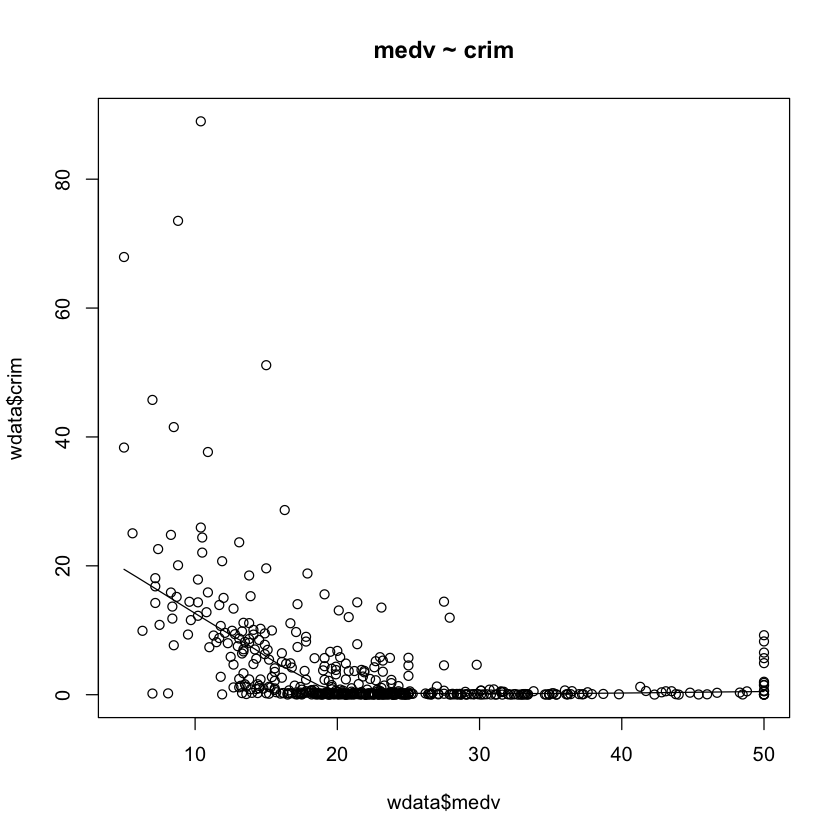

In [69]:
# Evidencia gráfica a través del gráfico de dispersión 
scatter.smooth(x = wdata$medv, y = wdata$crim, main = "medv ~ crim")

**<u>Interpretación resultados</u>.-** Podemos observar en el gráfico de dispersión que no existe un patrón aleatorio, es decir, que no nos aparece todo el cuadrado lleno de puntos colocados de manera aleatoria. Luego, este hecho, es una evidencia de que podría existir una relación entre las variables. Como siempre, tenemos que confirmarlo con las evidencias numércias y contrastadas.

In [70]:
# Evidencia numérica
cor(wdata$medv, wdata$crim)

[1] -0.3883046

**<u>Interpretación resultados</u>.-** Observamos que el coeficiente de correlación estimado entre las variables es distinto de $0$, con lo cual es posible que se cumpla lo que habíamos observado gráficamente: que las variables sí están relacionadas. Sin embargo, hasta que no realicemos el contraste de correlación no sabremos si está bien calculado dicho coeficiente y podemos tomarlo como válido.

In [71]:
# Evidencia contrastada
cor.test(wdata$medv, wdata$crim)


	Pearson's product-moment correlation

data:  wdata$medv and wdata$crim
t = -9.4597, df = 504, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4599064 -0.3116859
sample estimates:
       cor 
-0.3883046 


**<u>Interpretación resultados</u>.-** El $p$-valor obtenido es muy pequeño: $< 2.2e-16$ siendo $< \alpha = 0.05$, luego tenemos que rechazar la hipótesis nula de que la correlación sea igual $0$, es decir, el valor de las propiedades y la tasa de crimen per capita de los distritos a los que petenece cada una de las viviendas SI están correlacionados. En particular, el coeficiente de correlación sería igual a $-0.3883046$ determinando que existe una relación inversa entre el precio de las viviendas y la tasa de criminalidad. Es decir, a mayores tasas de de crimen per capita de los distritos a los que petenece cada una de las viviendas, dichas propiedades tendrán un valor menor y viceversa. Por tanto, SI podemos realizar la estimación de un modelo de regresión lineal entre dichas variables.

<div style="background-color:#5DADE2"><b>Apartado 3: Estimación de un modelo de regresión lineal simple entre las variables</b></div>

El Modelo de Regresión Lineal Simple (MRLS) que tenemos que estimar utilizando las funciones de R sería el siguiente: 

\begin{align*}
medv_{i}&=\beta_{0}+\beta_{1}*crim_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

In [72]:
# Estimación del modelo de regresión lineal simple incluyendo el dataset como parámetro
modelo = lm(medv ~ crim, data = wdata)  
modelo


Call:
lm(formula = medv ~ crim, data = wdata)

Coefficients:
(Intercept)         crim  
    24.0331      -0.4152  


**<u>Interpretación resultados</u>.-** Los coeficientes del modelo de regresión lineal estimado son $\beta_0 = 24.0331$ y $\beta_1 = -0.4152$. La interpretación de los parámetros $\beta_0$ y $\beta_1$ en un modelo de regresión lineal simple donde la variable dependiente es el precio de las viviendas y la variable independiente es la tasa de criminalidad per capita de cada uno de los barrios de dichas viviendas es fundamental para comprender la relación entre estas dos variables. En este caso, $\beta_0=24.0331$ representa el valor de la intersección con el eje y, lo que implica el precio medio de todas las viviendas consideradas (en miles de dólares) cuando la tasa de criminalidad es cero. Por otro lado, $\beta_1=-0.4152$ es el coeficiente de la pendiente y muestra cómo cambia el nivel de precios de la vivienda en función de la tasa de criminalidad. Específicamente, indica que por cada grado adicional que se aumente en la tasa de criminalidad, se espera una disminución de un $40\%$ en el nivel de precios de las viviendas. Este coeficiente negativo sugiere una relación inversa y proporcional entre ambas variables, donde un mayor nivel de criminalidad se asocia con precios menores de las viviendas de dichos barrios.

In [73]:
# Información de salida del modelo de regresión estimado
str(modelo)

List of 12
 $ coefficients : Named num [1:2] 24.033 -0.415
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "crim"
 $ residuals    : Named num [1:506] -0.0305 -2.4218 10.6782 9.3803 12.1956 ...
  ..- attr(*, "names")= chr [1:506] "1" "2" "3" "4" ...
 $ effects      : Named num [1:506] -506.86 -80.25 10.72 9.42 12.24 ...
  ..- attr(*, "names")= chr [1:506] "(Intercept)" "crim" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:506] 24 24 24 24 24 ...
  ..- attr(*, "names")= chr [1:506] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:506, 1:2] -22.4944 0.0445 0.0445 0.0445 0.0445 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:506] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "crim"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.04 1.02
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 504
 $ xlevels    

<div style="background-color:#5DADE2"><b>Apartado 4: Interpretación de las salidas de estimación de un modelo de regresión lineal simple</b></div>

Las principales funciones que se aplican sobre un objeto`lm` (obtenido tras realizar la estimación oportuna del modelo de regresión lineal):

1. ¿Cómo extraer el output de la regresión? Tenéis que utilizar la función **`summary()`**. 
2. ¿Cómo extraer los coeficientes de regresión estimados? Tenéis que utilizar la función **`coef()`**. 
3. ¿Cómo extraer los valores ajustados de la variable dependiente? Tenéis que utilizar la función **`fitted()`**.
4. ¿Cómo extraet los residuos estimados? Tenéis que utilizar la función **`resid()`**.
5. ¿Cómo extraer los grados de libertad? Tenéis que utilizar la función `df.residual`.
6. ¿Cómo extraer la suma de cuadrados de los residuos? Tenéis que utilizar la función **`deviance()`**.
7. ¿Cómo extraer los errores de los coeficientes de regresión estimados? No hay función de extracción para este caso.
8. ¿Cómo extraer los coeficientes de determinación? No hay función de extracción para este caso.
9. ¿Cómo extraer los intervalos de confianza para los coeficientes de regresión? Tenéis que utilizar la función **`confint()`**.
10. ¿Cómo extraer el estadístico F y su p-valor? Tenéis que utilizar la función **`anova()`**.

<div style="background-color:#0BF7CC"><b> Nota.- Recordar la importancia de comentar e interpretar los resultados obtenidos. Seguir indicaciones realizadas en las sesiones teóricas. </b></div>

#### 4.1 ¿Cómo extraer el output de la regresión?

In [74]:
# Aplicamos la función summary para obtener los principales resultados del modelo de regresión lineal
output = summary(modelo)
output


Call:
lm(formula = medv ~ crim, data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.957  -5.449  -2.007   2.512  29.800 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.03311    0.40914   58.74   <2e-16 ***
crim        -0.41519    0.04389   -9.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.484 on 504 degrees of freedom
Multiple R-squared:  0.1508,	Adjusted R-squared:  0.1491 
F-statistic: 89.49 on 1 and 504 DF,  p-value: < 2.2e-16


#### 4.2 ¿Cómo extraer los coeficientes de regresión estimados?

Vamos a extraer los coeficientes de regresión estimados a través de tres formas diferentes siendo todas ellas equivalentes. 

* Extracción directa de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})'$ utilizando el objeto `output`.


* Extracción de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})$ con la función $\tt coef$ sobre el `modelo` estimado.


* Cálculo manual de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})'$ a partir de la siguiente ecuación formal:

\begin{align*}
\hat{\beta}_{1}&=\frac{Cov(x,y)}{Var(x)}\\
\hat{\beta}_{0}&=\bar{y}-\hat{\beta}_{1}\bar{x}
\end{align*}

In [75]:
# Extracción directa de los coeficientes de regresión (utilizamos output NO modelo)
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),24.0331062,0.40914196,58.74026,1.341723e-227
crim,-0.4151903,0.04389038,-9.45971,1.173987e-19


In [76]:
# Extracción de los coeficientes de regresión con la función `coef`
bhat = coef(modelo)
bhat 

(Intercept)        crim 
 24.0331062  -0.4151903

In [77]:
# Cálculo manual de b1
# Obtenemos la covarianza entre x e y
covxy = cov(wdata$medv,wdata$crim)
covxy

[1] -30.71851

In [78]:
# Obtenemos la varianza entre x e y
varx = var(wdata$crim)
varx

[1] 73.98658

In [79]:
# Aplicamos la ecuación b1 = covxy/varx  
b1 = covxy/varx
b1

[1] -0.4151903

In [80]:
# Cálculo manual de b0
# Obtenemos la media de la variable y
meany = mean(wdata$medv)
meany

[1] 22.53281

In [81]:
# Obtenemos la media de la variable x
meanx = mean(wdata$crim)
meanx

[1] 3.613524

In [82]:
# Aplicamos la ecuación b0= meany-b1*meanx
b0 = meany-b1*meanx
b0

[1] 24.03311

#### 4.3 ¿Cómo extraer los valores ajustados de la variable dependiente?

Vamos a extraer los valores ajustados de la variable dependiente a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa de los valores ajustados de nuestra variable dependiente $\hat{y}$ sobre el `modelo` estimado.


+ Extracción de los valores ajustados de nuestra variable dependiente $\hat{y}$ con la función $\tt fitted$ sobre el `modelo` estimado.


+ Cálculo manual de los valores ajustados de nuestra variable dependiente $\hat{y}$ a partir de la siguiente ecuación formal:

\begin{align*}
\hat y_i&=\hat \beta_{0}+\hat \beta_{1}x_i 
\end{align*}

In [83]:
# Extracción directa de los valores ajustados de la variable dependiente
head(modelo$fitted.values)

1        2        3        4        5        6 
24.03048 24.02177 24.02178 24.01967 24.00444 24.02071

In [84]:
# Extracción de los valores ajustados de la variable dependiente con la función `fitted`
yhat = fitted(modelo)
head(yhat)

1        2        3        4        5        6 
24.03048 24.02177 24.02178 24.01967 24.00444 24.02071

In [85]:
# Cálculo manual de los valores ajustados (alternativa a)
yajustado = bhat[1]+bhat[2]*wdata$crim
head(yajustado)

[1] 24.03048 24.02177 24.02178 24.01967 24.00444 24.02071

In [86]:
# Cálculo manual de los valores ajustados (alternativa b)
yajustado1 = bhat["(Intercept)"]+bhat["crim"]*wdata$crim
head(yajustado1)

[1] 24.03048 24.02177 24.02178 24.01967 24.00444 24.02071

#### 4.4 ¿Cómo extraer los residuos estimados?

Vamos a extraer los residuos estimados a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa del valor de los residuos estimados $\hat{\epsilon}$ sobre el `modelo` estimado.


+ Extracción del valor de los residuos estimados $\hat{\epsilon}$ con la función $\tt resid$ sobre el `modelo`  estimado.


+ Cálculo manual del valor de los residuos estimados $\hat{\epsilon}$ a partir de la siguiente ecuación formal. Es decir, los resiudos se calculan como la diferencia entre el valor predicho o ajustado y el valor real tal entre cada individuo $i=1,..., n$.

\begin{align*}
\hat \epsilon_i = y_i - \hat y_i 
\end{align*}

In [87]:
# Extracción directa del valor de los residuos estimados
head(modelo$residuals)

1           2           3           4           5           6 
-0.03048217 -2.42176733 10.67822437  9.38033354 12.19556271  4.67928726

In [88]:
# Extracción del valor de los residuos estimados con la función `resid`
uhat = resid(modelo)
head(uhat)

1           2           3           4           5           6 
-0.03048217 -2.42176733 10.67822437  9.38033354 12.19556271  4.67928726

In [89]:
# Cálculo manual del valor de los residuos
residuos = wdata$medv-yajustado
head(residuos)

[1] -0.03048217 -2.42176733 10.67822437  9.38033354 12.19556271  4.67928726

In [90]:
# Comprobamos y = y_estimado + residuos_estimados
head(cbind(wdata$medv,yhat,yajustado,yajustado1,uhat,residuos))

,,yhat,yajustado,yajustado1,uhat,residuos
1,24.0,24.03048,24.03048,24.03048,-0.03048217,-0.03048217
2,21.6,24.02177,24.02177,24.02177,-2.42176733,-2.42176733
3,34.7,24.02178,24.02178,24.02178,10.67822437,10.67822437
4,33.4,24.01967,24.01967,24.01967,9.38033354,9.38033354
5,36.2,24.00444,24.00444,24.00444,12.19556271,12.19556271
6,28.7,24.02071,24.02071,24.02071,4.67928726,4.67928726


In [91]:
# Comprobamos y = y_estimado + residuos_estimados (1º observación)
24.03048-0.03048

[1] 24

#### 4.5 ¿Cómo extraer los grados de libertad?

Vamos a extraer los grados de libertad estimados a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa del valor de los grados de libertad utilizando el objeto `output`.


+ Extracción del valor de los grados de libertad con la función $\tt df.residual$ sobre el `modelo` estimado.


+ Cálculo manual del valor de los grados de libertad a partir de la siguiente ecuación formal:

$g.d.l.=n-k$ siendo $n$ el número de obervaciones totales y $k$ el número de parámetros estimados.

In [92]:
# Extracción directa del valor de los grados de libertad (utilizamos output NO modelo)
head(output$df)[2]   

[1] 504

In [93]:
# Extracción del valor de los grados de libertad con la función `df.residual`
df = df.residual(modelo)
df

[1] 504

In [94]:
# Cálculo manual** del valor de los grados de libertad (utilizamos output NO modelo)
gdl = nrow(wdata)- output$df[1]
gdl

[1] 504

#### 4.6 ¿Cómo extraer la suma de cuadrados de los residuos? 

Vamos a extraer la suma de cuadrados de los residuos estimados a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa de la suma de cuadrados de los residuos denotado por $SSR$ o $\hat{\sigma}$ utilizando el objeto `output`. Este estadístico cuantifica cuánta información de la variable dependiente se pierde con el modelo empleado (variables independientes utilizadas). Es útil cuándo lo comparamos con otros modelos.


+ Extracción del valor de la suma de cuadrados de los residuos con la función $\tt deviance$ sobre el `modelo` estimado.


+ Cálculo manual del valor de la suma de cuadrados de los residuos a partir de la siguiente ecuación formal:

\begin{align*}
SSR = \hat \sigma = \sqrt {\frac{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}} }}{{n - k}}}
\end{align*}

In [95]:
# Extracción directa de la suma de cuadrados de los residuos (utilizamos output NO modelo)
head(output$sigma)

[1] 8.483821

In [96]:
# Extracción del valor de la suma de cuadrados de los residuos con la función `deviance`
ssr = sqrt(deviance(modelo)/gdl)
ssr

[1] 8.483821

In [97]:
# Cálculo manual del valor de la suma de cuadrados de los residuos
resi2 = (residuos)^2
sigma = sqrt(sum(resi2)/gdl)
sigma

[1] 8.483821

#### 4.7 ¿Cómo extraer los errores de los parámetros estimados?

Vamos a extraer los errores de los parámetros estimados a través de dos formas diferentes siendo todas ellas equivalentes:

+ Extracción directa de los errores de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})'$ utilizando el objeto `output`.


+ Cálculo manual de los errores de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})'$ a partir de la siguiente ecuación formal. Los errores estándar de los parámetros estimados (`Std. Error`) se obtienen a partir de la raíz cuadrada de la diagonal de la matriz de varianzas-covarianzas estimada. El estimador de la matriz de varianzas-covarianzas se calcula a través de la siguiente expresión y se obtiene a través de la función `vcov` directamente.

\begin{align*}
Var\left( {\hat \beta } \right) = {\hat \sigma^2}{\left( {X'X} \right)^{ - 1}}
\end{align*}

In [98]:
# Extracción directa de los errores de los coeficientes de regresión (utilizamos output NO modelo)
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),24.0331062,0.40914196,58.74026,1.341723e-227
crim,-0.4151903,0.04389038,-9.45971,1.173987e-19


In [99]:
# Cálculo manual de los errores de los coeficientes de regresión
# Obtener la matriz de var-cov directamente
varcov = vcov(modelo)
varcov

,(Intercept),crim
(Intercept),0.167397143,-0.006960967
crim,-0.006960967,0.001926366


In [100]:
# Obtenemos los errores estándar de los parámetros estimados 
se = sqrt(diag(varcov))
print(se)

(Intercept)        crim 
 0.40914196  0.04389038 


In [101]:
# Obtenemos la matriz de var-cov paso a paso (paso 1)
X = as.matrix(cbind(cte=1,wdata[,2]))
head(X)

cte,
1,0.00632
1,0.02731
1,0.02729
1,0.03237
1,0.06905
1,0.02985


In [102]:
# Obtenemos la matriz de var-cov paso a paso (paso 2)
varcov2 = sigma^2 * solve(t(X) %*% X)
varcov2

,cte,
cte,0.167397143,-0.006960967
,-0.006960967,0.001926366


In [103]:
# Obtenemos los errores estándar de los parámetros estimados 
se2 = sqrt(diag(varcov2))
print(se2)

       cte            
0.40914196 0.04389038 


#### 4.8 ¿Cómo extraer los coeficientes de determinación?

Vamos a extraer los coeficientes de determinación estimados a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa del valor de los coeficientes de determinación utilizando el objeto `output`.


+ Cálculo manual del coeficiente de determinación a partir de la siguiente ecuación formal: (Opción 1)

\begin{align*}
R^{2}=1 - \frac{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}} }}{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }}
\end{align*}

siendo ${\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }$ la suma del cuadrado de la diferencia entre los valores originales de la variable dependiente $y_i$ y el valor promedio de la variable $\bar y_i$.

In [104]:
# Extracción directa del valor de los coeficientes de determinación
# Obtenemos R2 (utilizamos output NO modelo)
R2 = output$r.squared
R2

[1] 0.1507805

In [105]:
# Cálculo manual del coeficiente de determinación (Opción 1)
residuos2 = wdata$medv-mean(wdata$medv)
residuos2

[1]   1.46719368  -0.93280632  12.16719368  10.86719368  13.66719368
  [6]   6.16719368   0.36719368   4.56719368  -6.03280632  -3.63280632
 [11]  -7.53280632  -3.63280632  -0.83280632  -2.13280632  -4.33280632
 [16]  -2.63280632   0.56719368  -5.03280632  -2.33280632  -4.33280632
 [21]  -8.93280632  -2.93280632  -7.33280632  -8.03280632  -6.93280632
 [26]  -8.63280632  -5.93280632  -7.73280632  -4.13280632  -1.53280632
 [31]  -9.83280632  -8.03280632  -9.33280632  -9.43280632  -9.03280632
 [36]  -3.63280632  -2.53280632  -1.53280632   2.16719368   8.26719368
 [41]  12.36719368   4.06719368   2.76719368   2.16719368  -1.33280632
 [46]  -3.23280632  -2.53280632  -5.93280632  -8.13280632  -3.13280632
 [51]  -2.83280632  -2.03280632   2.46719368   0.86719368  -3.63280632
 [56]  12.86719368   2.16719368   9.06719368   0.76719368  -2.93280632
 [61]  -3.83280632  -6.53280632  -0.33280632   2.46719368  10.46719368
 [66]   0.96719368  -3.13280632  -0.53280632  -5.13280632  -1.63280632
 [71]   1.66719368  -0.83280632   0.26719368   0.86719368   1.56719368
 [76]  -1.13280632  -2.53280632  -1.73280632  -1.33280632  -2.23280632
 [81]   5.46719368   1.36719368   2.26719368   0.36719368   1.36719368
 [86]   4.06719368  -0.03280632  -0.33280632   1.06719368   6.16719368
 [91]   0.06719368  -0.53280632   0.36719368   2.46719368  -1.93280632
 [96]   5.86719368  -1.13280632  16.16719368  21.26719368  10.66719368
[101]   4.96719368   3.96719368  -3.93280632  -3.23280632  -2.43280632
[106]  -3.03280632  -3.03280632  -2.13280632  -2.73280632  -3.13280632
[111]  -0.83280632   0.26719368  -3.73280632  -3.83280632  -4.03280632
[116]  -4.23280632  -1.33280632  -3.33280632  -2.13280632  -3.23280632
[121]  -0.53280632  -2.23280632  -2.03280632  -5.23280632  -3.73280632
[126]  -1.13280632  -6.83280632  -6.33280632  -4.53280632  -8.23280632
[131]  -3.33280632  -2.93280632   0.46719368  -4.13280632  -6.93280632
[136]  -4.43280632  -5.13280632  -5.43280632  -9.23280632  -4.73280632
[141]  -8.53280632  -8.13280632  -9.13280632  -6.93280632 -10.73280632
[146]  -8.73280632  -6.93280632  -7.93280632  -4.73280632  -7.13280632
[151]  -1.03280632  -2.93280632  -7.23280632  -3.13280632  -5.53280632
[156]  -6.93280632  -9.43280632  18.76719368   1.76719368   0.76719368
[161]   4.46719368  27.46719368  27.46719368  27.46719368   0.16719368
[166]   2.46719368  27.46719368   1.26719368   1.26719368  -0.23280632
[171]  -5.13280632  -3.43280632   0.56719368   1.06719368   0.06719368
[176]   6.86719368   0.66719368   2.06719368   7.36719368  14.66719368
[181]  17.26719368  13.66719368  15.36719368   9.96719368   3.86719368
[186]   7.06719368  27.46719368   9.46719368   7.26719368  12.36719368
[191]  14.46719368   7.96719368  13.86719368   8.56719368   6.56719368
[196]  27.46719368  10.76719368   7.76719368  12.06719368  12.36719368
[201]  10.36719368   1.56719368  19.76719368  25.96719368  27.46719368
[206]   0.06719368   1.86719368  -0.03280632   1.86719368  -2.53280632
[211]  -0.83280632  -3.23280632  -0.13280632   5.56719368   1.16719368
[216]   2.46719368   0.76719368   6.16719368  -1.03280632   0.46719368
[221]   4.16719368  -0.83280632   4.96719368   7.56719368  22.26719368
[226]  27.46719368  15.06719368   9.06719368  24.16719368   8.96719368
[231]   1.76719368   9.16719368  19.16719368  25.76719368   6.46719368
[236]   1.46719368   2.56719368   8.96719368   1.16719368   0.76719368
[241]  -0.53280632  -2.43280632  -0.33280632   1.16719368  -4.93280632
[246]  -4.03280632   1.76719368  -2.03280632   1.96719368   3.66719368
[251]   1.86719368   2.26719368   7.06719368  20.26719368  -0.63280632
[256]  -1.63280632  21.46719368  27.46719368  13.46719368   7.56719368
[261]  11.26719368  20.56719368  26.26719368   8.46719368  13.96719368
[266]   0.26719368   8.16719368  27.46719368  20.96719368  -1.83280632
[271]  -1.43280632   2.66719368   1.86719368  12.66719368   9.86719368
[276]   9.46719368  10.66719368  10.56719368   6.56719368  12.56719368
[281]  22.86719368  12.867

In [106]:
# Cálculo manual del coeficiente de determinación (Opción 1)
R2.1 = 1-(sum(resi2)/sum((residuos2)^2))
R2.1

[1] 0.1507805

In [107]:
# Cálculo manual del coeficiente de determinación (Opción 2)
R2.2 = var(yhat)/var(wdata$medv)
R2.2

[1] 0.1507805

In [108]:
# Comprobamos que obtenemos el mismo resultado de las tres maneras
cbind(R2,R2.1,R2.2)

R2,R2.1,R2.2
0.1507805,0.1507805,0.1507805


#### 4.9 ¿Cómo extraer los intervalos de confianza para los coeficientes de regresión?

Vamos a extraer los intervalos de confianza para los coeficiente estimados a través de una forma únicamente:


+ Extracción de los intervalos de confianza para los coeficientes de regresión con la función $\tt confint$ sobre el `modelo` estimado. El parámetro `level` permite elegir el nivel de confianza (por defecto es 0.95). Es decir, el nivel de significación $\alpha$ es igual al $5\%$. 

In [109]:
# Extracción de los intervalos de confianza para los coeficientes de regresión con la función `confint`
# Ejemplo para un nivel de confianza del 95%
ci.bhat = confint(modelo)
ci.bhat

,2.5 %,97.5 %
(Intercept),23.2292723,24.8369400
crim,-0.5014209,-0.3289596


In [110]:
# Ejemplo para un nivel de confianza del 90% 
ci.bhat2 = confint(modelo, level = 0.9)
ci.bhat2

,5 %,95 %
(Intercept),23.3588883,24.7073241
crim,-0.4875165,-0.3428641


#### 4.10 ¿Cómo extraer el estadístico F y su p-valor?

Vamos a extraer el estadístico F y su p-valor estimado a través de una forma únicamente:

+ Extracción del estadístico F y su p-valor con la función $\tt anova$ sobre el `modelo` estimado. 

In [111]:
# Obtenemos el estadístico F y su p-valor con la función 'anova'
anova.ols = anova(modelo)
anova.ols

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
crim,1,6440.783,6440.78306,89.48611,1.173987e-19
Residuals,504,36275.512,71.97522,NA,NA


In [112]:
# Comprobamos que el valor del estadístico F y su p-valor coinciden con los que aparecen en el summary del modelo
summary(modelo)


Call:
lm(formula = medv ~ crim, data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.957  -5.449  -2.007   2.512  29.800 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.03311    0.40914   58.74   <2e-16 ***
crim        -0.41519    0.04389   -9.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.484 on 504 degrees of freedom
Multiple R-squared:  0.1508,	Adjusted R-squared:  0.1491 
F-statistic: 89.49 on 1 and 504 DF,  p-value: < 2.2e-16


<div style="background-color:#0BF7CC"><b> Nota.- Recordar la importancia de comentar e interpretar los resultados obtenidos. Seguir indicaciones realizadas en las sesiones teóricas. </b></div>

### Ejercicio 3

Utilizando el dataset `airquality` encontrar el mejor modelo de regresión lineal simple de la variable dependiente `Ozone` en función de las siguientes variables (considerar una a una): `Temp` que nos indica la temperatura máxima diaria (en grados Fahrenheit), `Solar.R` que mide la radiación solar (en Ly, Langleys) y la variable `Wind` que recoge la información sobre la velocidad media del viento (en mph, millas por hora). Comparar sus métricas y realizar la diagnosis del modelo de regresión lineal elegido. Es decir, tenéis que hacer los pasos incluidos en el apartado no. $5$ del Notebook teórico:

1. Criterios de selección del modelo en base al ajuste de los datos
2. Modificaciones del modelo de regresión lineal simple seleccionado
3. Requisitos y validación del mejor modelo seleccionado en base al ajuste de los datos

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 03</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1: Criterios de selección del modelo en base al ajuste de los datos</b></div>

En los modelos de regresión lineal simple la comparación de modelos se realizará cambiando la variable independiente entre todas las que se consideren en la base de datos para ver con cuál obtenemos un mejor ajuste. Por tanto, surge la idea de determinar de forma objetiva cuál es el mejor modelo, en el sentido de cuál es la variable independiente que explique la mayor cantidad de varianza posible. Así, llegamos a la cuestión de qué criterio utilizar para comparar dos modelos de regresión lineal simple con diferentes variables. Normalmente se utilizan los siguientes criterios de selección de modelos para este fin:

1. Comparación del coeficiente de determinación ajustado: el modelo con un mayor $R^2_{adj}$ será el mejor de los comparados. 


2. Comparación de los criterios de información de Akaike (AIC) y Bayesiano (BIC): cuanto menor sea el valor, mejor será el ajuste realizado. La diferencia entre AIC y BIC es la severidad con la que penalizan el número de parámetros considerados. La fórmula de cada uno de ellos es la siguiente:

- $AIC = n\ln \left( {SSR/n} \right) + 2k$

- $BIC = n\ln \left( {SSR/n} \right) + k\ln \left( n \right)$

donde $SSR$ indica la suma de los cuadrados de los residuos, cuantifica cuánta información de la variable dependiente se pierde con el modelo, el número de variables utilizado $k$ y el número total de observaciones $n$. Teniendo en cuenta que nuestra variable dependiente será `Ozone`, nos preguntamos: ¿cuál es el mejor modelo de regresión lineal simple que podemos obtener considerando la base de datos $\tt airquality$? En particular, consideraremos las siguientes variables dependientes: `Temp` que nos indica la temperatura máxima diaria (en grados Fahrenheit), `Solar.R` que mide la radiación solar (en Ly, Langleys) y la variable `Wind` que recoge la información sobre la velocidad media del viento (en mph, millas por hora).

In [113]:
# Estructura de la base de datos 'airquality'
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [114]:
# Variables de la base de datos 'airquality'
names(airquality)

[1] "Ozone"   "Solar.R" "Wind"    "Temp"    "Month"   "Day"

In [115]:
# Seleccionamos las 4 variables que nos interesan
zdata = airquality[, c("Ozone", "Temp","Solar.R","Wind")]

In [116]:
# Visualizamos la base de datos seleccionada
head(zdata)

,Ozone,Temp,Solar.R,Wind
,<int>,<int>,<int>,<dbl>
1,41,67,190,7.4
2,36,72,118,8.0
3,12,74,149,12.6
4,18,62,313,11.5
5,NA,56,NA,14.3
6,28,66,NA,14.9


In [117]:
# Comprobamos si existen datos NAs para en caso afirmativo, eliminarlos y que no nos den problemas
wdata = na.omit(zdata)

In [118]:
# Podemos comprobar como se han eliminado 42 observaciones por no tener datos
nrow(zdata) # Base de datos inicial
nrow(wdata) # Base de datos tras el na.omit

[1] 153

[1] 111

In [119]:
# Visualizamos la base de datos seleccionada
head(wdata)

,Ozone,Temp,Solar.R,Wind
,<int>,<int>,<int>,<dbl>
1,41,67,190,7.4
2,36,72,118,8.0
3,12,74,149,12.6
4,18,62,313,11.5
7,23,65,299,8.6
8,19,59,99,13.8


In [120]:
# Definimos cada modelo en función de una variable independiente diferente 
mod1 = lm(Ozone ~ Temp, data = wdata)
mod2 = lm(Ozone ~ Solar.R, data = wdata)
mod3 = lm(Ozone ~ Wind, data = wdata)

In [121]:
# Calculamos los 3 criterios de selección de modelos
# Coeficiente de determinación ajustado
R2 = c(summary(mod1)$adj.r.squared, summary(mod2)$adj.r.squared,summary(mod3)$adj.r.squared)

In [122]:
# Criterio de Información de Akaike
AIC = c(extractAIC(mod1)[2],extractAIC(mod2)[2],extractAIC(mod3)[2])

In [123]:
# Criterio de Información Bayesiano
BIC = c(extractAIC(mod1,k=log(nrow(wdata)))[2],extractAIC(mod2,k=log(nrow(wdata)))[2],
      extractAIC(mod3,k=log(nrow(wdata)))[2])

In [124]:
# Organizaremos los valores de los diferentes criterios en un dataframe para facilitar su comparación
# Usaremos la función `kable` de la libería knitr para obtener una tabla bien formateada
# Instalamos y cargamos la librería
install.packages("knitr")
require(knitr)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: knitr



In [125]:
# Obtenemos la tabla de comparación
Medidas = data.frame(R2,AIC,BIC,row.names=c("modelo1","modelo2","modelo3"))
names(Medidas) = c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas)



|        | Coef.R2adj|      AIC|      BIC|
|:-------|----------:|--------:|--------:|
|modelo1 |  0.4832625| 706.7708| 712.1899|
|modelo2 |  0.1132809| 766.7100| 772.1291|
|modelo3 |  0.3694195| 728.8715| 734.2906|

**<u>Interpretación resultados</u>.-** ¿Con cuál nos queadríamos? Veamos los valores de $R^2_{adj}$, AIC y BIC para decidir cuál de estos tres modelos es el mejor para explicar nuestra variable dependiente (concentración media de ozono en la atmósfera). En este caso, seleccionaríamos el **modelo 1** ya que es el que tiene mayor $R^2_{adj}$ y menor AIC y BIC. Es decir, para explicar la variable `Ozone` el mejor modelo (y variable) encontrado de entre todos los que hemos comparado sería con `Temp`. Es decir, el nivel de temperatura media diaria, de entre todas las comparadas, que mejor explica el impacto que tiene en la concentración de ozono en la atmósfera de la muestra considerada.

<div style="background-color:#5DADE2"><b>Apartado 2: Modificaciones del modelo de regresión lineal simple seleccionado</b></div>

Una vez que tenemos nuestro mejor modelo seleccionado, nos piden compararlo con las diferentes transformaciones del modelo elegido de regresión lineal simple:

1. Modelo de regresión lineal simple sobre el origen: si queremos un modelo sin término constante que pase por el origen (0,0).
2. Modelo de regresión lineal simple sobre una constante: si queremos que la recta sea horizontal y la pendiente sea igual a 0. En este caso, $\hat \beta = \bar y$.   

In [126]:
# Modelo de regresión lineal simple sobre el origen: hay que poner 0 o -1 para no poner término cte
# Estimación del modelo origen
mod_origen = lm(Ozone ~ 0 + Temp, data = wdata)

# Obtenemos el output del modelo origen
output_mod_origen = summary(mod_origen)
output_mod_origen


Call:
lm(formula = Ozone ~ 0 + Temp, data = wdata)

Residuals:
   Min     1Q Median     3Q    Max 
-38.52 -23.34 -13.38  14.34 121.91 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
Temp  0.56898    0.03612   15.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.82 on 110 degrees of freedom
Multiple R-squared:  0.6929,	Adjusted R-squared:  0.6901 
F-statistic: 248.2 on 1 and 110 DF,  p-value: < 2.2e-16


In [127]:
# Modelo de regresión lineal simple sobre una constante: hay que poner 1 para que beta_1=0
# Estimación del modelo constante
mod_cte = lm(Ozone ~ 1, data = wdata)

# Obtenemos el output del modelo constante
output_mod_cte = summary(mod_cte)
output_mod_cte


Call:
lm(formula = Ozone ~ 1, data = wdata)

Residuals:
   Min     1Q Median     3Q    Max 
 -41.1  -24.1  -11.1   19.9  125.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   42.099      3.158   13.33   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.28 on 110 degrees of freedom


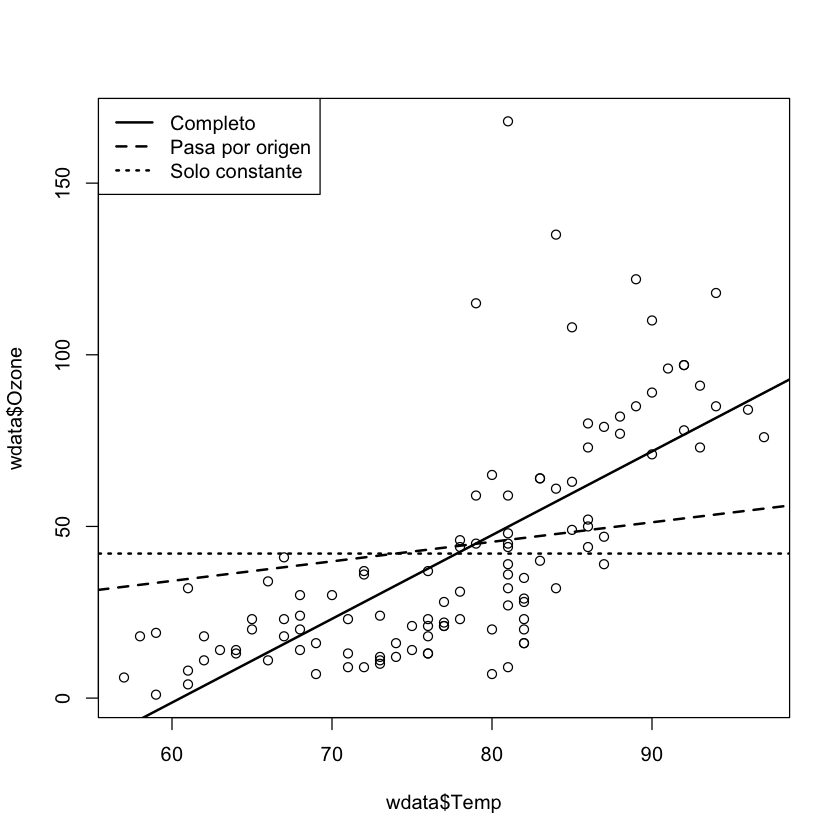

In [128]:
# Representación gráfica para comparar los tres modelos
plot(wdata$Temp, wdata$Ozone)
abline(mod1, lwd = 2, lty = 1)
abline(mod_origen, lwd = 2, lty = 2)
abline(mod_cte, lwd = 2, lty = 3)
legend("topleft", c("Completo", "Pasa por origen", "Solo constante"), lwd = 2, lty = 1:3)

In [129]:
# Calculamos los 3 criterios de selección de modelos
# Coeficiente de determinación ajustado
R2_mejor = c(summary(mod1)$adj.r.squared, summary(mod_origen)$adj.r.squared, summary(mod_cte)$adj.r.squared)

In [130]:
# Criterio de Información de Akaike
AIC_mejor = c(extractAIC(mod1)[2], extractAIC(mod_origen)[2], extractAIC(mod_cte)[2])

In [131]:
# Criterio de Información Bayesiano
BIC_mejor = c(extractAIC(mod1,k=log(nrow(wdata)))[2],extractAIC(mod_origen,k=log(nrow(wdata)))[2],
      extractAIC(mod_cte,k=log(nrow(wdata)))[2])

In [132]:
# Obtenemos la tabla de comparación
Medidas_mejor = data.frame(R2_mejor,AIC_mejor,BIC_mejor,row.names=c("modelo1","modelo_origen","modelo_cte"))
names(Medidas) = c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas_mejor)



|              |  R2_mejor| AIC_mejor| BIC_mejor|
|:-------------|---------:|---------:|---------:|
|modelo1       | 0.4832625|  706.7708|  712.1899|
|modelo_origen | 0.6900898|  754.7379|  757.4474|
|modelo_cte    | 0.0000000|  779.0689|  781.7785|

**<u>Interpretación resultados</u>.-** ¿Con cuál nos quedaríamos? En este caso, el modelo constante queda descartado puesto que su $R^2_{adj}$ es igual a $0$, es decir, no es capaz de explicar nada. Utilizando la transformación del modelo origen vemos como mejoramos sustancialmente la capacidad explicativa ya que pasamos de un $R^2_{adj}$ igual a $0.4832625$ a $0.6900898$, aunque vemos que también aumenta el AIC y el BIC. En este caso, en el que tenemos que un modelo tiene mayor $R^2_{adj}$ y otro, menor AIC/BIC, nos quedaremos con aquél que tiene mayor capacidad explicativa aunque podamos estar perdiendo algo más de información. Hasta que no veamos otros criterios de selección de modelos, seguiremos estas pautas en este supuesto de igualdad de modelos.

<div style="background-color:#5DADE2"><b>Apartado 3: Requisitos y validación del mejor modelo seleccionado en base ajuste de los datos</b></div>

Finalmente, tenemos que comprobar si el mejor modelo seleccionado es BUENO o NO. Es decir, tenemos que validar el modelo ya que podría ser el menos malo de todos los modelos que hemos comparado. Este proceso se denomina la diagnosis del modelo seleccionado y se centra en el análisis de los residuos (errores). Para que sea considerado bueno deberá de cumplir la mayoría de las siguientes condiciones. 

* Relativos al modelo [Gráfico 1]: Queremos comprobar si las variables están linealmente relacionadas. Para ello, hay que representar los valores de los residuos vs valores predichos `(Residuals vs Fitted)`.


* Relativos a los residuos [Gráficos 2-3]: Tenemos que saber si los errores del modelo siguen una distribución normal con media 0 y varianza $σ^2$ constante. Para ello, contamos con el gráfico Q-Q `(Q-Q plot)` que sirve para examinar la normalidad de los residuos y además, hay que representar gráficamente los valores predichos vs raíz cuadrada de los residuos estandarizados `(Fitted vs Square Standarized Residuals)` que sirve para comprobar la homocedasticidad del modelo, es decir, si la varianza de los errores es constante y no depende del valor de las variables independientes.

  
* Relativos a las observaciones anómalas [Gráfico 4]: Hay que comporbar si algunas de las observaciones no se ajusten al modelo, comprometiendo su validez general. Para ello, representaremos gráficamente los valores de los residuos del modelo para identificar observaciones influyentes `(Residuals vs Leverage)`.

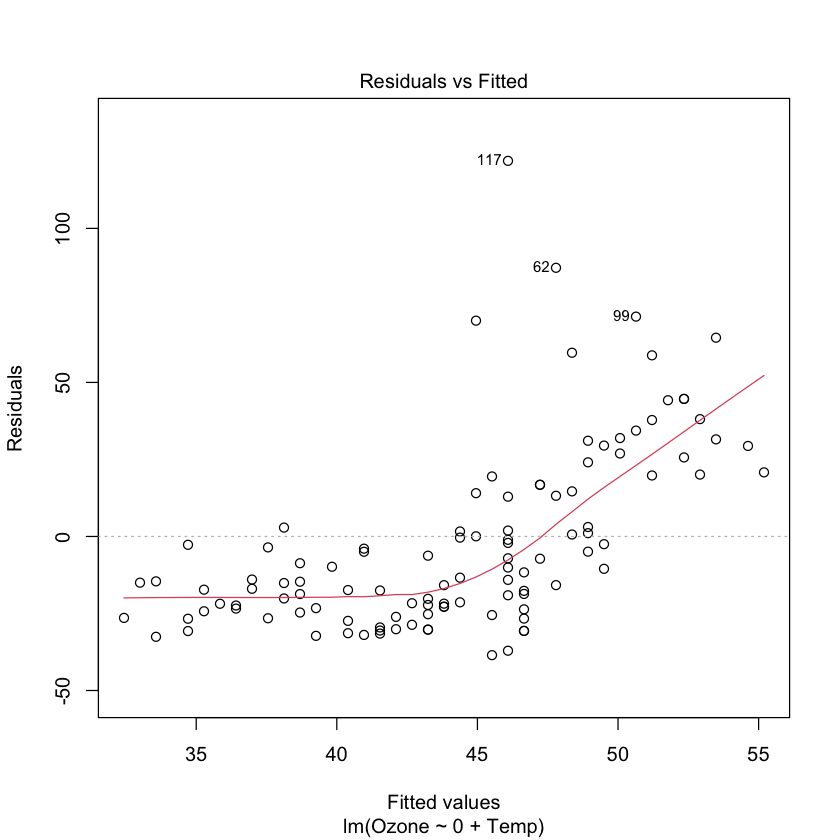

In [133]:
# Gráfico 1: Diagnosis para ver si los residuos y los valores ajustados están linealmente relacionados
plot(mod_origen, which=1)

**<u>Interpretación resultados</u>.-** La primera gráfica nos ayuda a decidir si las variables están linealmente relacionadas. Si es así, NO debería de existir una relación sistemática entre los resíduos (errores) y los valores predichos (ajustados). Es decir, el modelo debería de capturar toda la varianza sistemática de los datos, dejando sólo ruido estocástico sin explicar. Por tanto, para que sea una evidencia positiva esta gráfica debe de verse sin un patrón claro de asociación apareciendo todo cuadro del gráfico lleno de puntos. En este caso, podemos ver como existe un cierto patrón, luego sería una `evidencia NEGATIVA`.

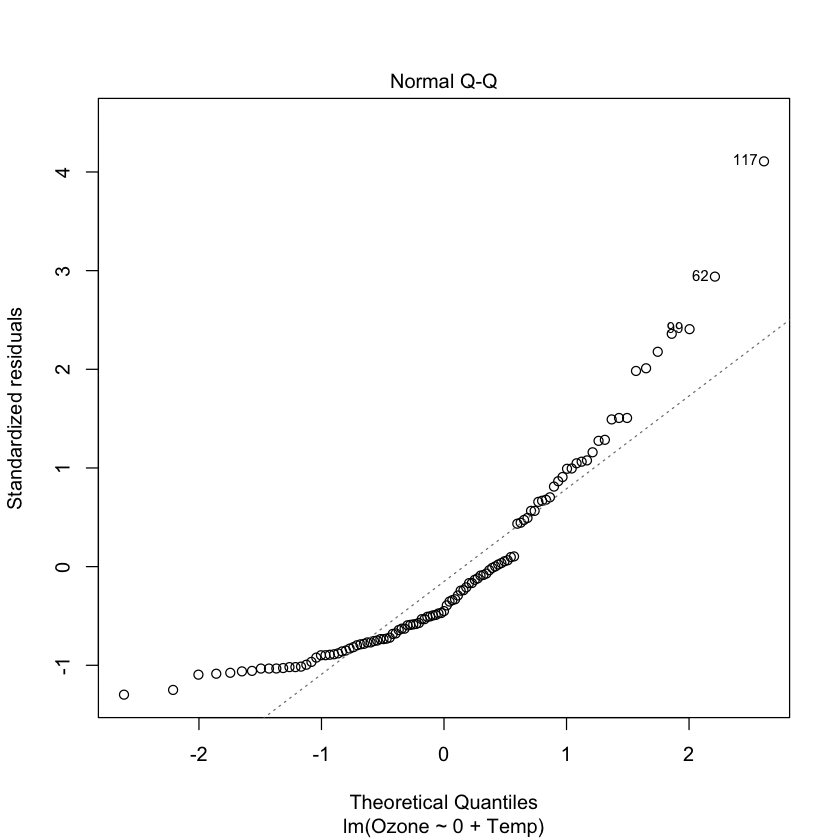

In [134]:
# Gráfico 2: Diagnosis para comprobar si los residuos se distribuyen como una normal
plot(mod_origen, which=2)

**<u>Interpretación resultados</u>.-** La segunda es la gráfica de quantil-quantil sobre la normalidad de los residuos. Para que sea una evidencia positiva en esta gráfica los puntos deberían seguir la diagonal si los residuos están normalmente distribuidos. Si aparecen patrones tipo "S" o de ontra índole, como ocurre en este caso, sería una `evidencia NEGATIVA` de que los residuos no siguen una distribución normal. 

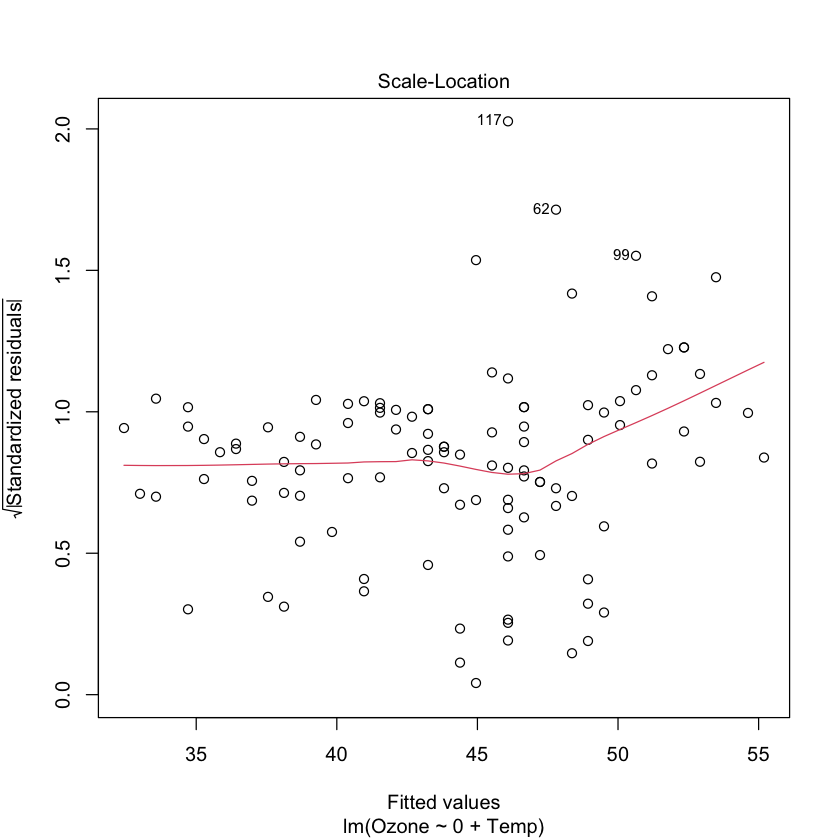

In [135]:
# Gráfico 3: Diagnosis para comprobar si la varianza de los residuos es constante
plot(mod_origen, which=3)

**<u>Interpretación resultados</u>.-** La tercera gráfica es como la primera, pero usando una escala diferente, residuos estandarizados, y sirve para comprobar la homocedasticidad de la varianza de los residuos. Para que sea una evidencia positiva en esta gráfica se tiene que poder dibujar una línea en torno a la horizontal. En caso contrario, cómo ocurre con la última parte de la gráfica, sería una `evidencia NEGATIVA`. Es decir, la varianza de los residuos no serían homocedásticos sino heterocedásticos. 

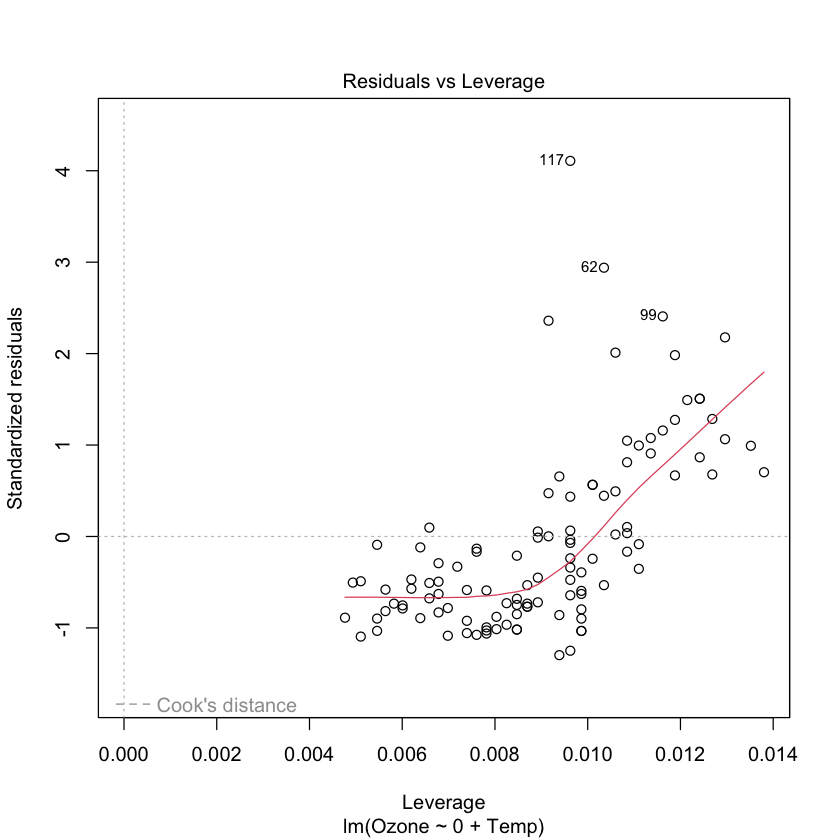

In [136]:
# Gráfico 4: Diagnosis para comprobar si existen observaciones anómalas
plot(mod_origen, which=5)

**<u>Interpretación resultados</u>.-** La última gráfica trata sobre la identificación de puntos influyentes, aberrantes y con efecto palanca del siguiente modo: 

* Las observaciones influyentes son aquellas con un impacto desproporcionado en la determinación de los parámetros del modelo. Se identifican usando la distancia de Cook. Para que sea una `evidencia POSITIVA`, como ocurre en este caso, en esta gráfica NO deben de existir puntos con valores superiores a la línea de Cook.  


* Un punto aberrante es una observación que tiene un valor muy alto del residuo asociado. Para que sea una evidencia positiva en esta gráfica NO deben de exitir puntos con valores muy negativos y muy a la derecha. En este caso, podemos ver como existen varios puntos que incumplen dicha condición. Luego, sería una `evidencia NEGATIVA`. 


* Una observación con alto efecto palanca "leverage" es una observación que no es predicha satisfactoriamente por el modelo de regresión. Para que sea una evidencia positiva, en esta gráfica NO deben de exitir puntos con valores muy positivos y muy a la derecha. En este caso, podemos ver como existen varios puntos que incumplen dicha condición. Luego, sería una `evidencia NEGATIVA`.

**<mark>Conclusión final diagnosis</marck>.-** La única de las hipótesis que si se cumple es la no existencia de observaciones influyentes siendo el resto de evidencias negativas. Luego, podemos afirmar que el mejor modelo seleccionado NO sería del todo BUENO para explicar la variable nivel de concentración media de ozono en la atmósfera `Ozone` en función de la temperatura media diaria `Temp` teniendo en cuenta la muestra considerada.

**¡Para sacar Nota!** Os dejo a ustedes que confirméis con evidencias numéricas y contrastadas las hipótesis de normalidad y homocedasticidad de los residuos y la existencia de una relación lineal entre los valores ajustados y los residuos. Con respecto a los outliers con las evidencias gráficas y el estadístico de la distancia de Cook es necesario para confirmar que la cumple. No os pediré evidencias contrastadas en este último gráfico.

### Ejercicio 4

Utilizando el dataset `Boston` encontrar el mejor modelo de regresión lineal simple de la variable `medv` en función del resto de variables excepto `chas` y `rad` (considerar una a una). Comparar sus métricas y realizar la diagnosis del modelo de regresión lineal elegido. Es decir, tenéis que hacer los pasos incluidos en el apartado no. $5$ del Notebook teórico:

1. Criterios de selección del modelo en base al ajuste de los datos
2. Modificaciones del modelo de regresión lineal simple seleccionado
3. Requisitos y validación del mejor modelo seleccionado en base al ajuste de los datos

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 04</b></div>

<div style="background-color:#0BF7CC"><b> Nota.- En este ejercicio tenéis que hacer los mismos pasos que hemos realizado en el ejercicio no. 3. Al utilizar otra base de datos y diferentes variables, los resultados y por tanto, las interpretaciones, serán diferentes pero la estructura del ejercicio es la misma (paso a paso). </b></div>

<div style="background-color:#5DADE2"><b>Apartado 1: Criterios de selección del modelo en base al ajuste de los datos</b></div>

En los modelos de regresión lineal simple la comparación de modelos se realizará cambiando la variable independiente entre todas las que se consideren en la base de datos para ver con cuál obtenemos un mejor ajuste. Por tanto, surge la idea de determinar de forma objetiva cuál es el mejor modelo, en el sentido de cuál es la variable independiente que explique la mayor cantidad de varianza posible. Así, llegamos a la cuestión de qué criterio utilizar para comparar dos modelos de regresión lineal simple con diferentes variables. Normalmente se utilizan los siguientes criterios de selección de modelos para este fin:

1. Comparación del coeficiente de determinación ajustado: el modelo con un mayor $R^2_{adj}$ será el mejor de los comparados. 


2. Comparación de los criterios de información de Akaike (AIC) y Bayesiano (BIC): cuanto menor sea el valor, mejor será el ajuste realizado. La diferencia entre AIC y BIC es la severidad con la que penalizan el número de parámetros considerados. La fórmula de cada uno de ellos es la siguiente:

- $AIC = n\ln \left( {SSR/n} \right) + 2k$

- $BIC = n\ln \left( {SSR/n} \right) + k\ln \left( n \right)$

donde $SSR$ indica la suma de los cuadrados de los residuos, cuantifica cuánta información de la variable dependiente se pierde con el modelo, el número de variables utilizado $k$ y el número total de observaciones $n$. Teniendo en cuenta que nuestra variable dependiente será `medv`, nos preguntamos: ¿cuál es el mejor modelo de regresión lineal simple que podemos obtener considerando la base de datos $\tt Boston$?

In [137]:
# Estructura de la base de datos 'Boston'
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [138]:
# Variables de la base de datos 'Boston'
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [139]:
# Seleccionamos las 12 variables que nos interesan eliminando chas y rad
borrar = c("chas","rad")
zdata = Boston[ , !(names(Boston) %in% borrar)]

In [140]:
# Visualizamos la base de datos seleccionada
head(zdata)

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0.458,6.430,58.7,6.0622,222,18.7,394.12,5.21,28.7


In [141]:
# Comprobamos si existen datos NAs para en caso afirmativo, eliminarlos y que no nos den problemas
wdata = na.omit(zdata)

In [142]:
# Podemos comprobar como NO existen datos missing
nrow(zdata) # Base de datos inicial
nrow(wdata) # Base de datos tras el na.omit

[1] 506

[1] 506

In [143]:
# Visualizamos la base de datos seleccionada (podemos utilizar las BD zdata o wdata indistintamente)
head(wdata)

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0.458,6.430,58.7,6.0622,222,18.7,394.12,5.21,28.7


In [144]:
# Definimos cada modelo en función de una variable independiente diferente 
mod1 = lm(medv ~ crim, data = wdata)
mod2 = lm(medv ~ zn, data = wdata)
mod3 = lm(medv ~ indus, data = wdata)
mod4 = lm(medv ~ nox, data = wdata)
mod5 = lm(medv ~ rm, data = wdata)
mod6 = lm(medv ~ age, data = wdata)
mod7 = lm(medv ~ dis, data = wdata)
mod8 = lm(medv ~ tax, data = wdata)
mod9 = lm(medv ~ ptratio, data = wdata)
mod10 = lm(medv ~ black, data = wdata)
mod11 = lm(medv ~ lstat, data = wdata)

In [145]:
# Calculamos los 3 criterios de selección de modelos
# Coeficiente de determinación ajustado
R2 = c(summary(mod1)$adj.r.squared, summary(mod2)$adj.r.squared,summary(mod3)$adj.r.squared,
    summary(mod4)$adj.r.squared,summary(mod5)$adj.r.squared,summary(mod6)$adj.r.squared,
    summary(mod7)$adj.r.squared,summary(mod8)$adj.r.squared,summary(mod9)$adj.r.squared,
    summary(mod10)$adj.r.squared,summary(mod11)$adj.r.squared)

In [146]:
# Criterio de Información de Akaike
AIC = c(extractAIC(mod1)[2],extractAIC(mod2)[2],extractAIC(mod3)[2],extractAIC(mod4)[2],
     extractAIC(mod5)[2],extractAIC(mod6)[2],extractAIC(mod7)[2],extractAIC(mod8)[2],
     extractAIC(mod9)[2],extractAIC(mod10)[2],extractAIC(mod11)[2])

In [147]:
# Criterio de Información Bayesiano
BIC = c(extractAIC(mod1,k=log(nrow(wdata)))[2],extractAIC(mod2,k=log(nrow(wdata)))[2],
     extractAIC(mod3,k=log(nrow(wdata)))[2],extractAIC(mod4,k=log(nrow(wdata)))[2],
     extractAIC(mod5,k=log(nrow(wdata)))[2],extractAIC(mod6,k=log(nrow(wdata)))[2],
     extractAIC(mod7,k=log(nrow(wdata)))[2],extractAIC(mod8,k=log(nrow(wdata)))[2],
     extractAIC(mod9,k=log(nrow(wdata)))[2],extractAIC(mod10,k=log(nrow(wdata)))[2],
     extractAIC(mod11,k=log(nrow(wdata)))[2])

In [148]:
# Obtenemos la tabla de comparación
Medidas = data.frame(R2,AIC,BIC,row.names=c("modelo1","modelo2","modelo3","modelo4","modelo5","modelo6","modelo7",
                                            "modelo8","modelo9","modelo10","modelo11"))
names(Medidas) = c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas)



|         | Coef.R2adj|      AIC|      BIC|
|:--------|----------:|--------:|--------:|
|modelo1  |  0.1490955| 2165.815| 2174.268|
|modelo2  |  0.1281945| 2178.094| 2186.547|
|modelo3  |  0.2324702| 2113.635| 2122.088|
|modelo4  |  0.1809812| 2146.489| 2154.942|
|modelo5  |  0.4825007| 1914.185| 1922.638|
|modelo6  |  0.1403926| 2170.964| 2179.417|
|modelo7  |  0.0606042| 2215.877| 2224.330|
|modelo8  |  0.2179774| 2123.100| 2131.553|
|modelo9  |  0.2563748| 2097.625| 2106.078|
|modelo10 |  0.1094326| 2188.868| 2197.321|
|modelo11 |  0.5432418| 1851.009| 1859.462|

**<u>Interpretación resultados</u>.-** ¿Con cuál nos queadríamos? Veamos los valores de $R^2_{adj}$, AIC y BIC para decidir cuál de estos once modelos es el mejor para explicar nuestra variable dependiente (precio de la vivienda). En este caso, seleccionaríamos el **modelo 11** ya que es el que tiene mayor $R^2_{adj}$ y menor AIC y BIC. Es decir, para explicar la variable `medv` el mejor modelo (y variable) encontrado de entre todos los que hemos comparado sería con `lstat`. Es decir, las menores condiciones económicas de la población residente en cada uno de los barrios, de entre todas las comparadas, es lo que mejor explica el impacto que tiene en el precio de las viviendas de cada uno de las propiedades consideradas.

<div style="background-color:#5DADE2"><b>Apartado 2: Modificaciones del modelo de regresión lineal simple seleccionado</b></div>

Una vez que tenemos nuestro mejor modelo seleccionado, nos piden compararlo con las diferentes transformaciones del modelo elegido de regresión lineal simple:

1. Modelo de regresión lineal simple sobre el origen: si queremos un modelo sin término constante que pase por el origen (0,0).
2. Modelo de regresión lineal simple sobre una constante: si queremos que la recta sea horizontal y la pendiente sea igual a 0. En este caso, $\hat \beta = \bar y$.   

In [149]:
# Modelo de regresión lineal simple sobre el origen: hay que poner 0 o -1 para no poner término cte
# Estimación del modelo origen
mod_origen = lm(medv ~ 0 + lstat, data = wdata)

# Obtenemos el output del modelo origen
output_mod_origen = summary(mod_origen)
output_mod_origen


Call:
lm(formula = medv ~ 0 + lstat, data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.495  -1.853   8.141  17.564  48.059 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
lstat  1.12210    0.05535   20.27   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.09 on 505 degrees of freedom
Multiple R-squared:  0.4486,	Adjusted R-squared:  0.4476 
F-statistic: 410.9 on 1 and 505 DF,  p-value: < 2.2e-16


In [150]:
# Modelo de regresión lineal simple sobre una constante: hay que poner 1 para que beta_1=0
# Estimación del modelo constante
mod_cte = lm(medv ~ 1, data = wdata)

# Obtenemos el output del modelo constante
output_mod_cte = summary(mod_cte)
output_mod_cte


Call:
lm(formula = medv ~ 1, data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.533  -5.508  -1.333   2.467  27.467 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.5328     0.4089   55.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.197 on 505 degrees of freedom


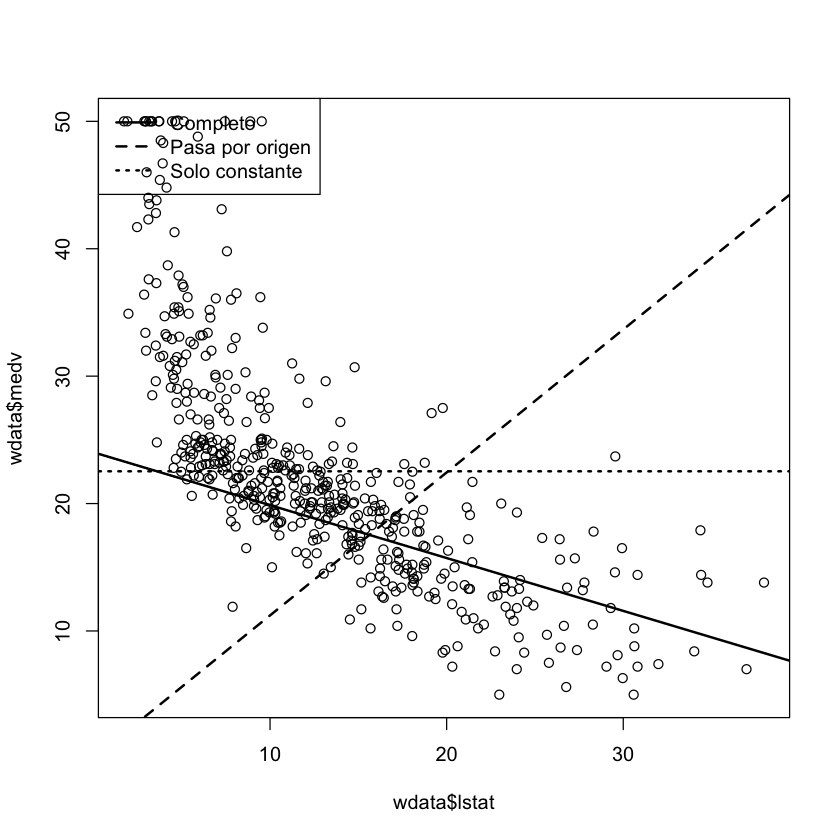

In [151]:
# Representación gráfica para comparar los tres modelos
plot(wdata$lstat, wdata$medv)
abline(mod1, lwd = 2, lty = 1)
abline(mod_origen, lwd = 2, lty = 2)
abline(mod_cte, lwd = 2, lty = 3)
legend("topleft", c("Completo", "Pasa por origen", "Solo constante"), lwd = 2, lty = 1:3)

In [152]:
# Calculamos los 3 criterios de selección de modelos
# Coeficiente de determinación ajustado
R2_mejor = c(summary(mod1)$adj.r.squared, summary(mod_origen)$adj.r.squared, summary(mod_cte)$adj.r.squared)

In [153]:
# Criterio de Información de Akaike
AIC_mejor = c(extractAIC(mod1)[2], extractAIC(mod_origen)[2], extractAIC(mod_cte)[2])

In [154]:
# Criterio de Información Bayesiano
BIC_mejor = c(extractAIC(mod1,k=log(nrow(wdata)))[2],extractAIC(mod_origen,k=log(nrow(wdata)))[2],
      extractAIC(mod_cte,k=log(nrow(wdata)))[2])

In [155]:
# Obtenemos la tabla de comparación
Medidas_mejor = data.frame(R2_mejor,AIC_mejor,BIC_mejor,row.names=c("modelo1","modelo_origen","modelo_cte"))
names(Medidas) = c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas_mejor)



|              |  R2_mejor| AIC_mejor| BIC_mejor|
|:-------------|---------:|---------:|---------:|
|modelo1       | 0.1490955|  2165.815|  2174.268|
|modelo_origen | 0.4475575|  2930.916|  2935.142|
|modelo_cte    | 0.0000000|  2246.514|  2250.741|

**<u>Interpretación resultados</u>.-** ¿Con cuál nos quedaríamos? En este caso, el modelo constante queda descartado puesto que su $R^2_{adj}$ es igual a $0$, es decir, no es capaz de explicar nada. Utilizando la transformación del modelo origen vemos como mejoramos sustancialmente la capacidad explicativa ya que pasamos de un $R^2_{adj}$ igual a $0.1490955$ a $0.4475575$, aunque vemos que también aumenta el AIC y el BIC. Al igual que en el ejercicio no. 2, en este caso, en el que tenemos que un modelo tiene mayor $R^2_{adj}$ y otro, menor AIC/BIC, nos quedaremos con aquél que tiene mayor capacidad explicativa aunque podamos estar perdiendo algo más de información. Hasta que no veamos otros criterios de selección de modelos, seguiremos estas pautas en este supuesto de igualdad de modelos.

<div style="background-color:#5DADE2"><b>Apartado 3: Requisitos y validación del mejor modelo seleccionado en base ajuste de los datos</b></div>

Finalmente, tenemos que comprobar si el mejor modelo seleccionado es BUENO o NO. Es decir, tenemos que validar el modelo ya que podría ser el menos malo de todos los modelos que hemos comparado. Este proceso se denomina la diagnosis del modelo seleccionado y se centra en el análisis de los residuos (errores). Para que sea considerado bueno deberá de cumplir la mayoría de las siguientes condiciones. 

* Relativos al modelo [Gráfico 1]: Queremos comprobar si las variables están linealmente relacionadas. Para ello, hay que representar los valores de los residuos vs valores predichos `(Residuals vs Fitted)`.


* Relativos a los residuos [Gráficos 2-3]: Tenemos que saber si los errores del modelo siguen una distribución normal con media 0 y varianza $σ^2$ constante. Para ello, contamos con el gráfico Q-Q `(Q-Q plot)` que sirve para examinar la normalidad de los residuos y además, hay que representar gráficamente los valores predichos vs raíz cuadrada de los residuos estandarizados `(Fitted vs Square Standarized Residuals)` que sirve para comprobar la homocedasticidad del modelo, es decir, si la varianza de los errores es constante y no depende del valor de las variables independientes.

  
* Relativos a las observaciones anómalas [Gráfico 4]: Hay que comporbar si algunas de las observaciones no se ajusten al modelo, comprometiendo su validez general. Para ello, representaremos gráficamente los valores de los residuos del modelo para identificar observaciones influyentes `(Residuals vs Leverage)`.

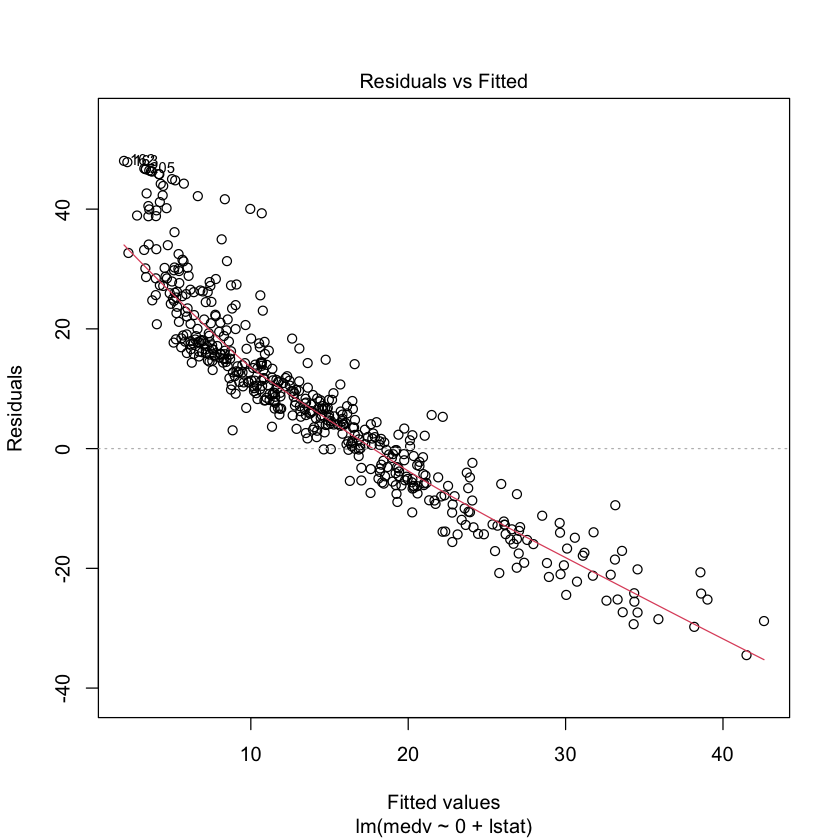

In [156]:
# Gráfico 1: Diagnosis para ver si los residuos y los valores ajustados están linealmente relacionados
plot(mod_origen, which=1)

**<u>Interpretación resultados</u>.-** La primera gráfica nos ayuda a decidir si las variables están linealmente relacionadas. Si es así, NO debería de existir una relación sistemática entre los resíduos (errores) y los valores predichos (ajustados). Es decir, el modelo debería de capturar toda la varianza sistemática de los datos, dejando sólo ruido estocástico sin explicar. Por tanto, para que sea una evidencia positiva esta gráfica debe de verse sin un patrón claro de asociación apareciendo todo cuadro del gráfico lleno de puntos. En este caso, podemos ver como existe un cierto patrón, luego sería una `evidencia NEGATIVA`.

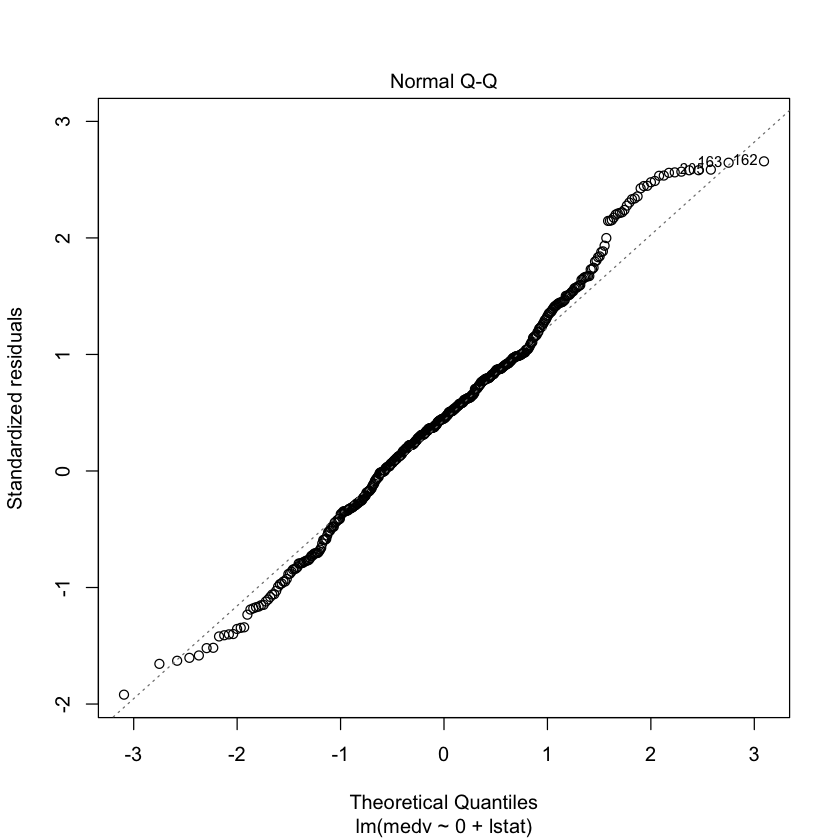

In [157]:
# Gráfico 2: Diagnosis para comprobar si los residuos se distribuyen como una normal
plot(mod_origen, which=2)

**<u>Interpretación resultados</u>.-** La segunda es la gráfica de quantil-quantil sobre la normalidad de los residuos. Para que sea una `evidencia POSITIVA`, como ocurre en este caso, en esta gráfica los puntos deberían seguir la diagonal si los residuos están normalmente distribuidos. Si aparecen patrones tipo "S" o de ontra índole sería una evidencia negativa de que los residuos no siguen una distribución normal. 

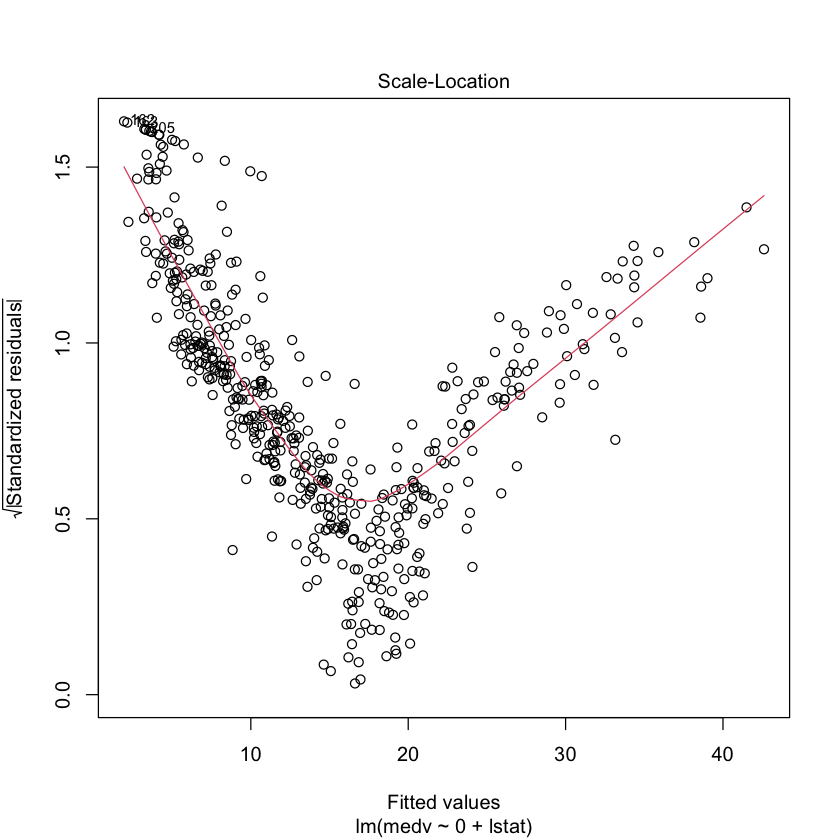

In [158]:
# Gráfico 3: Diagnosis para comprobar si la varianza de los residuos es constante
plot(mod_origen, which=3)

**<u>Interpretación resultados</u>.-** La tercera gráfica es como la primera, pero usando una escala diferente, residuos estandarizados, y sirve para comprobar la homocedasticidad de la varianza de los residuos. Para que sea una evidencia positiva en esta gráfica se tiene que poder dibujar una línea en torno a la horizontal. En caso contrario, cómo ocurre con esta gráfica, sería una `evidencia NEGATIVA`. Es decir, la varianza de los residuos no serían homocedásticos sino heterocedásticos. 

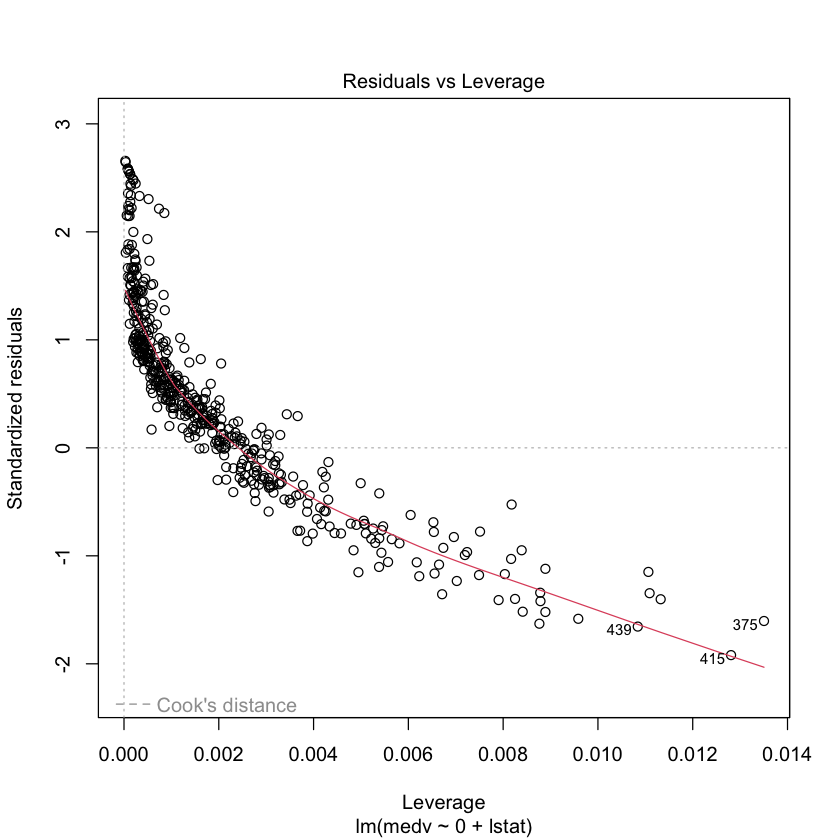

In [159]:
# Gráfico 4: Diagnosis para comprobar si existen observaciones anómalas
plot(mod_origen, which=5)

**<u>Interpretación resultados</u>.-** La última gráfica trata sobre la identificación de puntos influyentes, aberrantes y con efecto palanca del siguiente modo: 

* Las observaciones influyentes son aquellas con un impacto desproporcionado en la determinación de los parámetros del modelo. Se identifican usando la distancia de Cook. Para que sea una `evidencia POSITIVA`, como ocurre en este caso, en esta gráfica NO deben de existir puntos con valores superiores a la línea de Cook.  


* Un punto aberrante es una observación que tiene un valor muy alto del residuo asociado. Para que sea una evidencia positiva en esta gráfica NO deben de exitir puntos con valores muy negativos y muy a la derecha. En este caso, podemos ver como existen varios puntos que incumplen dicha condición. Luego, sería una `evidencia NEGATIVA`. 


* Una observación con alto efecto palanca "leverage" es una observación que no es predicha satisfactoriamente por el modelo de regresión. Para que sea una `evidencia POSITIVA`, como ocurre en este caso, en esta gráfica NO deben de exitir puntos con valores muy positivos y muy a la derecha.

**<mark>Conclusión final diagnosis</marck>.-** En este ejercicio hemos obtenido tres evidencias positivas y tres evidencias negativas por lo que en función de los resultados obtenidos del proceso de diagnosis gráfico de los residuos NO podemos afirmar que el mejor modelo seleccionado fuese o no BUENO para explicar la variable nivel de precios de las viviendas consideradas. En ambos ejercicios ($2$ y $4$) no nos han salido resultados robustos sobre la validez de nuestros modelos. En cierto modo, puede ser algo lógico ya que tener en cuenta que estamos considerando solamente una única variable explicativa.

**¡Nuevamente!** Os dejo a ustedes que confirméis con evidencias numéricas y contrastadas las hipótesis de normalidad y homocedasticidad de los residuos y la existencia de una relación lineal entre los valores ajustados y los residuos. Con respecto a los outliers con las evidencias gráficas y el estadístico de la distancia de Cook es necesario para confirmar que la cumple. No os pediré evidencias contrastadas en este último gráfico.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>